## Loading the libraries

In [186]:
#pip install graphviz

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import probplot
from sklearn.linear_model import LinearRegression    #### skikit learn website
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [134]:
df=pd.read_csv("Steel_industry_data.csv")
df = pd.DataFrame(data=df)

In [31]:
df.head()  ## Checking the data structure by looking at first 5 records

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [32]:
df.shape # There are 11 columns and 35040 rows in the given dataset

(35040, 11)

In [33]:
df.describe() ## This displays the summary statistics of the data.

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.090000      0.020000   
max                               27.760000      0.070000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  35040.000000                  35040.000000   
mean                      80.578056                     84.367870   
std                       18.921322                     30.456535   
min                        0.000000                      0.000000   
25%                       63.320000                     99.700000   
50%                       87.960000                    100.000000   
75%                       99.022500                    100.000000   
max                      100.000000                    100.000000   

                NSM  
count  35040.000000  
mean   42750.000000  
std    24940.534317  
min        0.000000  
25%    21375.000000  
50%    42750.000000  
75%    64125.000000  
max    85500.000000

In [34]:
df.info() # There is no missing value.
          # Data type of date,WeekStatus,Day_of_week,Load_type is String, 
          # NSM is integer type and rest columns are Numerical Variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

# Data cleaning and imputation and handling duplication

In [35]:
missing_val_df = pd.DataFrame().from_records([{'Column Name':col, 
                                               'Missing Values': len(df[df[col].isna()]), 
                                               'Missing Values (%)':np.round(len(df[df[col].isna()])/len(df), 4)*100}
                                              for col in df.columns])
print('Missing values before data cleaning')
missing_val_df

Missing values before data cleaning


Column Name  Missing Values  Missing Values (%)
0                                   date               0                 0.0
1                              Usage_kWh               0                 0.0
2   Lagging_Current_Reactive.Power_kVarh               0                 0.0
3   Leading_Current_Reactive_Power_kVarh               0                 0.0
4                              CO2(tCO2)               0                 0.0
5           Lagging_Current_Power_Factor               0                 0.0
6           Leading_Current_Power_Factor               0                 0.0
7                                    NSM               0                 0.0
8                             WeekStatus               0                 0.0
9                            Day_of_week               0                 0.0
10                             Load_Type               0                 0.0

In [36]:
#Check for Duplicate Values
df_duplicate=df[df.duplicated()]
if len(df_duplicate) > 0 :
    print("Below are the duplicate rows !!!")   
    df_duplicate
else :
    print("There are no duplicate rows !!!")    

There are no duplicate rows !!!


### We can not use Datetime data directly in Regression model, so we are creating Column 'Shift' to label the data for Day and Night time

In [148]:
df["Shift"]=df['date'].apply(lambda x : "Day" if pd.to_datetime(str(x)).time().hour >=7 and pd.to_datetime(str(x)).time().hour < 19 else "Night" )
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  Shift  
0    Weekday      Monday  Light_Load  Night  
1    Weekday      Monday  Light_Load  Night  
2    Weekday      Monday  Light_Load  Night  
3    Weekday      Monday  Light_Load  Night  
4    Weekday      Monday  Light_Load  Night

In [149]:
#df=df.drop(columns=['date'])
bins = [0,5, 10, 20,30,40,50,60,70,80,90, 100,110,120,130,140,150,160]
labels = ['0-5','5-10', '10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120','120-130','130-140','140-150','150-160']
df['Usage_KWh_Bin'] = pd.cut(x = df['Usage_kWh'], bins = bins, labels = labels, include_lowest = True)
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  Shift Usage_KWh_Bin  
0    Weekday      Monday  Light_Load  Night           0-5  
1    Weekday      Monday  Light_Load  Night           0-5  
2    Weekday      Monday  Light_Load  Night           0-5  
3    Weekday      Monday  Light_Load  Night           0-5  
4    Weekday      Monday  Light_Load  Night           0-5

# Exploratory Data Analysis

Questions which we would like to figure out :
1. What factors most influence the Type of Energy Load?
2. What Factor which triggered an energy load that is classified as a maximum load?
3. how effectively the energy load has been consumed?

Based on the available columns, it will be easier to analyze if the columns are categorized as follows:

1. Numerical contains columns with numeric data types only
2. Categorical contains columns with only categorical data types
3. Date provides a special datetime data type column

In [55]:
# Grouping columns based on column dtypes
df_num = df.select_dtypes(include=["int","float"],exclude=["datetime"])
df_catg = df.select_dtypes(exclude=["int","float","datetime"])
df_catg=df_catg.drop(columns=['date'])
#df_num=df_num.drop(columns=['date'])
df_date= df["date"]

In [56]:
df_num.describe()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.090000      0.020000   
max                               27.760000      0.070000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  35040.000000                  35040.000000   
mean                      80.578056                     84.367870   
std                       18.921322                     30.456535   
min                        0.000000                      0.000000   
25%                       63.320000                     99.700000   
50%                       87.960000                    100.000000   
75%                       99.022500                    100.000000   
max                      100.000000                    100.000000   

                NSM  
count  35040.000000  
mean   42750.000000  
std    24940.534317  
min        0.000000  
25%    21375.000000  
50%    42750.000000  
75%    64125.000000  
max    85500.000000

Insights:

1. Mean > 50% (Median) in Usage_kWh, Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh, CO2(tCO2) indicates that these fields have a positive skewed distribution.
2. Mean < 50% (Median) in Lagging_Current_Power_Factor and Leading_Current_Power_Factor indicates that the column has a negative skewed distribution
3. Mean = 50% (Median) in NSM indicates that the column has a normal distribution

In [57]:
# showing the precise value counts
for col in df_catg:
  print(f"Value counts of {col} column")
  print(df_catg[col].value_counts(), '\n')

Value counts of WeekStatus column
Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64 

Value counts of Day_of_week column
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64 

Value counts of Load_Type column
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64 

Value counts of Shift column
Night    17520
Day      17520
Name: Shift, dtype: int64 

Value counts of Usage_KWh_Bin column
0-5        18768
50-60       2699
5-10        2131
40-50       2100
60-70       1944
30-40       1887
70-80       1119
80-90        843
90-100       792
20-30        752
100-110      736
110-120      499
10-20        323
120-130      283
130-140      126
140-150       34
150-160        4
Name: Usage_KWh_Bin, dtype: int64 



Insights:

1. the Day_of_week column has a unique value of 7 according to the number of days in 1 week, with the value 'Monday' having the highest frequency of occurrence, namely 5088 rows
2. The Load_Type column only has 3 unique values, namely Light_Load, Medium_Load, and Maximum_Load, where these three values ​​describe the category of how much energy is expended every 15 minutes, in this column the value 'Light_Load' has the highest occurrence frequency, namely 18072 rows. So, judging from this value alone, we can conclude that the energy released every 15 minutes for a certain period of time is not too large, so companies don't need to worry about the budgetary funds used to pay for this energy load. But it doesn't stop there, because we want to learn more about this dataset.
3. Usage_KWh_Bin has 16 bin and we can see that data is mostly centered around 0-5 KWH hour , which indicate that this data is left skewed . Most of the data consuption is under 5 KWH

### Univariate Analysis

BAR PLOT FOR TARGET COLUMN

% Energy Load Type are
 Light_Load      51.58
Medium_Load     27.67
Maximum_Load    20.75
Name: Load_Type, dtype: float64


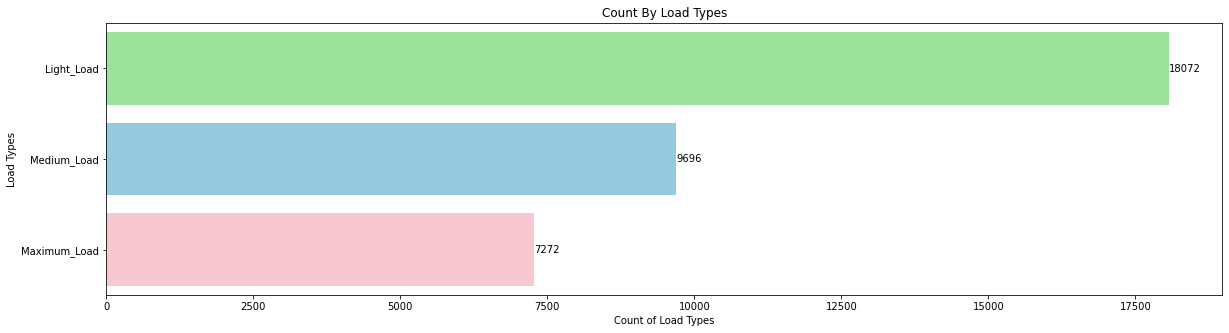

In [62]:
#Create a Bar Plot to see Energy Load
plt.figure(figsize=(20,5))
EnergyBar = sns.countplot(y="Load_Type", data=df, palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})
for container in EnergyBar.containers:
    EnergyBar.bar_label(container)
EnergyBar.set(title='Count By Load Types',xlabel='Count of Load Types', ylabel='Load Types')    
print("% Energy Load Type are\n", round(df.Load_Type.value_counts() / df.Load_Type.count()*100,2))

Insights:

1. There are 51.58% Load_Type which is Light_Load. This means that more than 50% of energy use in this industry is categorized as light energy use. So there is no need to worry about whether the use of energy used by this industry is excessive or not.
2. 20.75% of this dataset is categorized as Maximum_Load. This usually happens when there is an unusual use of the production process in this industry or there are certain moments or times when the production process requires maximum energy.

% Energy Usages by Load : 
 0-5        53.56
50-60       7.70
5-10        6.08
40-50       5.99
60-70       5.55
30-40       5.39
70-80       3.19
80-90       2.41
90-100      2.26
20-30       2.15
100-110     2.10
110-120     1.42
10-20       0.92
120-130     0.81
130-140     0.36
140-150     0.10
150-160     0.01
Name: Usage_KWh_Bin, dtype: float64


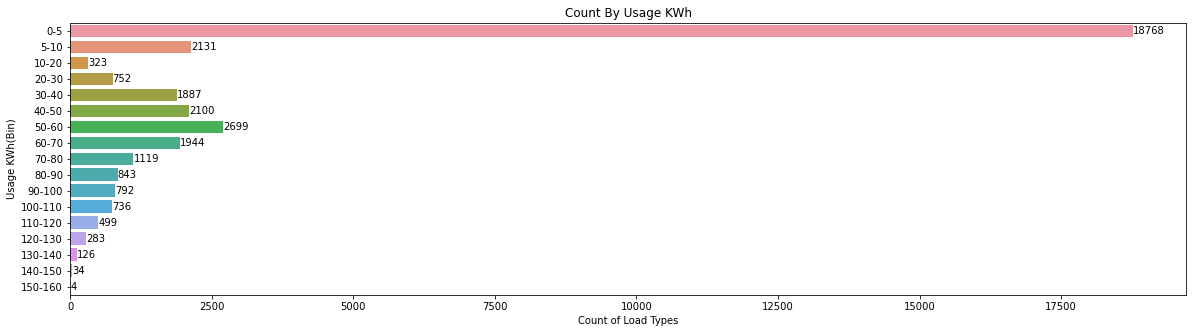

In [66]:
#Create a Bar Plot to see Energy Load
plt.figure(figsize=(20,5))
EnergyBar = sns.countplot(y="Usage_KWh_Bin", data=df)
for container in EnergyBar.containers:
    EnergyBar.bar_label(container)
EnergyBar.set(title='Count By Usage KWh',xlabel='Count of Load Types', ylabel='Usage KWh(Bin)')    
print("% Energy Usages by Load : \n", round(df.Usage_KWh_Bin.value_counts() / df.Usage_KWh_Bin.count()*100,2))

Insights:

1. There are 53.6%  rows where load is under 5 KWH/h, which is cosidered as a light load. This means that more than 53% of energy use in this industry is under 5 KWH/H. If , 5KWH is considered as a light load then this indicates that load is low most of the times except some peak scenarios which is < 5%.
2. 30% of this dataset usage more then 20 KWH , which is considered as very high load.

BAR PLOT FOR CATEGORICAL COLUMN

Value % of WeekStatus column
Weekday    71.51
Weekend    28.49
Name: WeekStatus, dtype: float64 

Value % of Day_of_week column
Monday       14.52
Tuesday      14.25
Wednesday    14.25
Thursday     14.25
Friday       14.25
Saturday     14.25
Sunday       14.25
Name: Day_of_week, dtype: float64 

Value % of Load_Type column
Light_Load      51.58
Medium_Load     27.67
Maximum_Load    20.75
Name: Load_Type, dtype: float64 

Value % of Shift column
Night    50.0
Day      50.0
Name: Shift, dtype: float64 

Value % of Usage_KWh_Bin column
0-5        53.56
50-60       7.70
5-10        6.08
40-50       5.99
60-70       5.55
30-40       5.39
70-80       3.19
80-90       2.41
90-100      2.26
20-30       2.15
100-110     2.10
110-120     1.42
10-20       0.92
120-130     0.81
130-140     0.36
140-150     0.10
150-160     0.01
Name: Usage_KWh_Bin, dtype: float64 



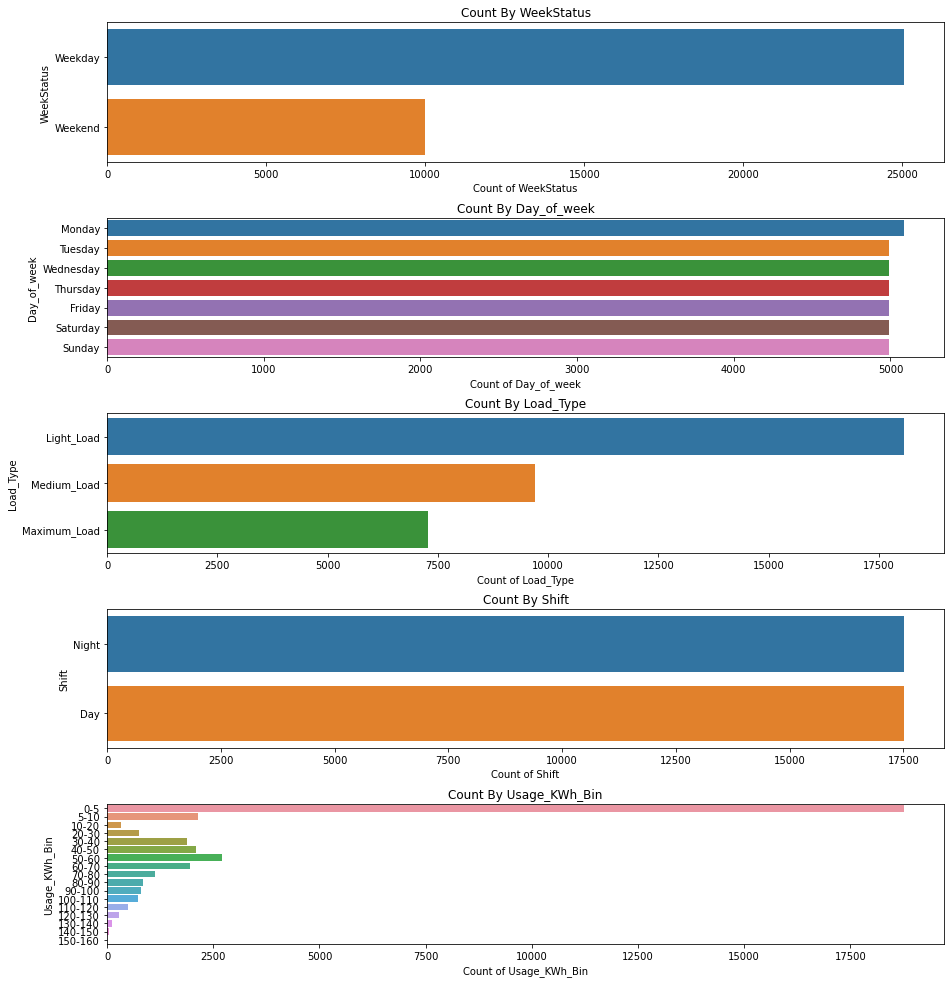

In [76]:
#Displays Percentage for Categorical data
for col in df_catg:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Creating Bar Plots for Categorical Data
plt.figure(figsize=(15,32))
plt.subplots_adjust(
                    #left=0.1,
                    bottom=0.5,
                    #right=0.1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i,col in enumerate(df_catg):    
    plt.subplot(5,1,i + 1)
    ax = sns.countplot(data = df, y = col).set(title=f"Count By {col}",xlabel=f"Count of {col}", ylabel=col)  
    

Insights:

It can be seen from the bar above, Monday has the highest percentage, namely 14.52%, even though it is only a difference of 0.27%, but the percentage of energy use for each day can be said to be the same, namely in the range of 14%.

### Bivariate / Multivariate Analysis

#### Seeing Load_Type's Relationship with Categorical data

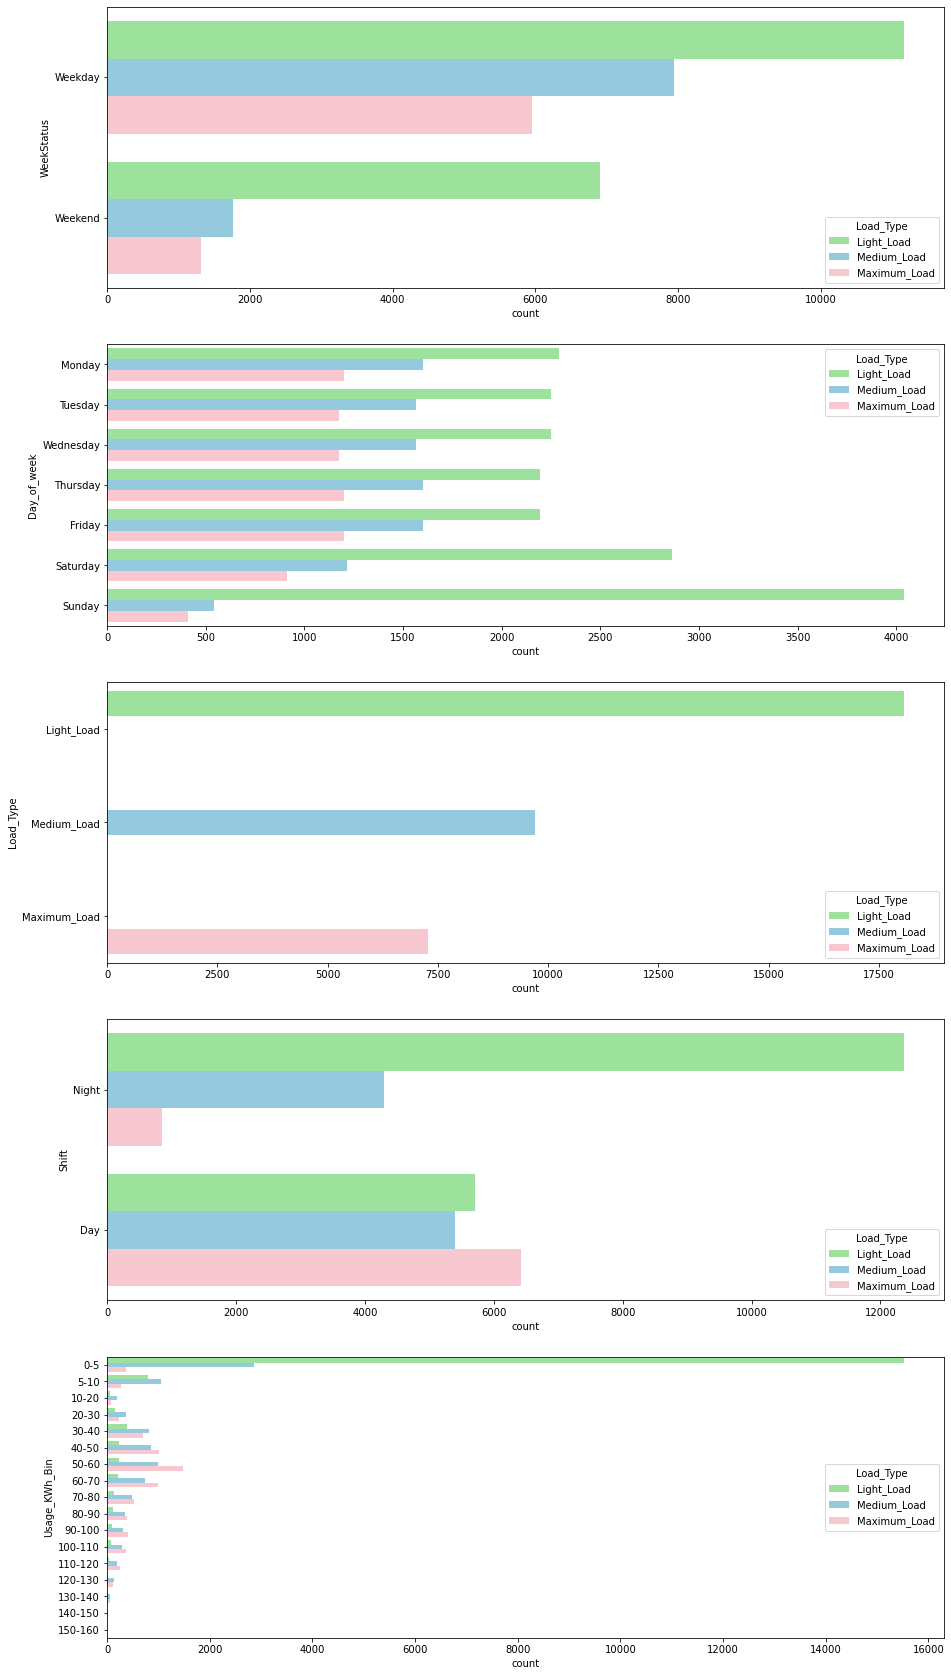

In [80]:
#Seeing Load_Type's Relationship with Categorical data
plt.figure(figsize=(15,30))

for i,col in enumerate(df_catg):    
    plt.subplot(5,1,i + 1)
    ax = sns.countplot(data = df, y = col, hue = "Load_Type", palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})

Insights:

1. Energy usage that Light_load increases with increasing days (approaching Sunday). This means that the use of energy in a week, less and less every day.
2. For Medium and Maximum Load_Type, the closer to Sunday the lower it is.
3. Sunday is the day with the lightest energy usage, because Medium and Maximum Load have a low amount while Light_Load has a large amount, so it can be said that Sunday is the day with the lowest energy usage compared to other days.
4. This might happen because on Saturdays and Sundays the company has holidays so some production is stopped due to holidays or weekends.

### Seeing Usgae's Relationship with Categorical data

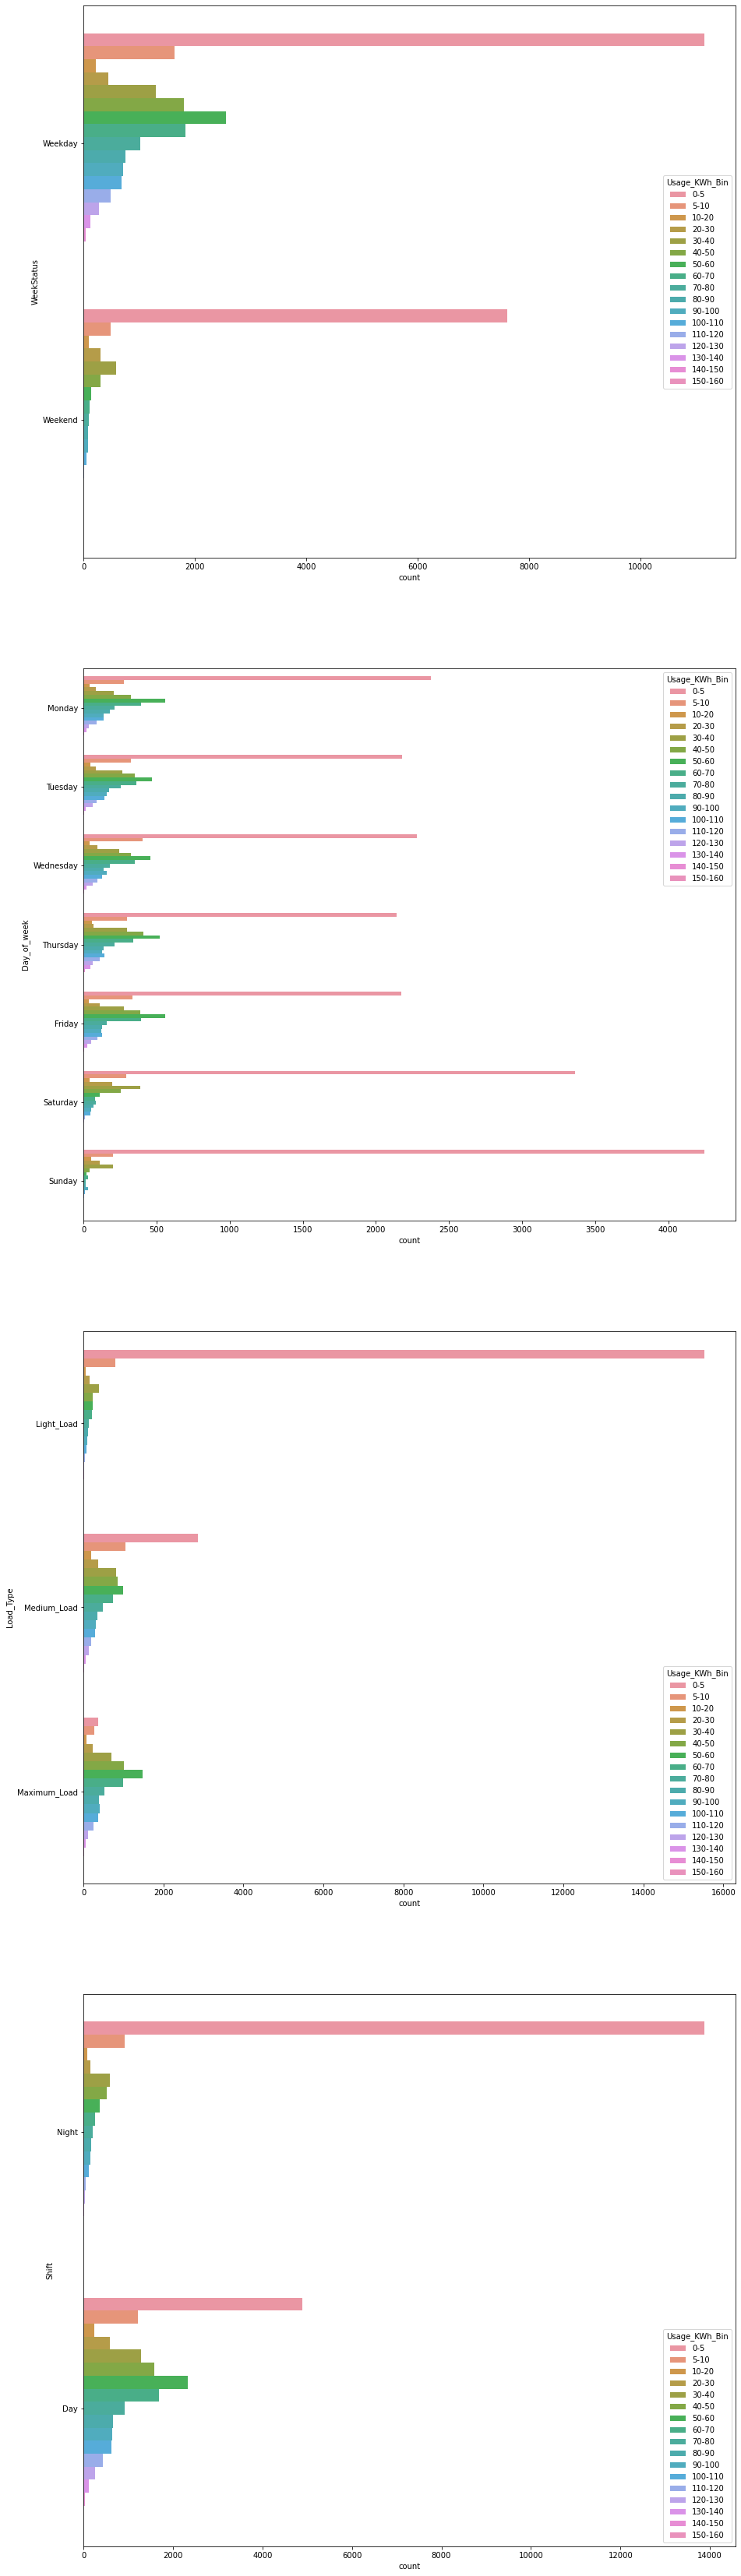

In [84]:
#Seeing Usage's Relationship with Categorical data
plt.figure(figsize=(15,60))

for i,col in enumerate(df_catg):   
    if col != 'Usage_KWh_Bin' :
        plt.subplot(4,1,i + 1)
        ax = sns.countplot(data = df, y = col, hue = "Usage_KWh_Bin")

Insights:

1. Energy usage that Light_load increases with increasing days (approaching Sunday). This means that the use of energy in a week, less and less every day.
2. For Medium and Maximum Load_Type, the closer to Sunday the lower it is.
3. Sunday is the day with the lightest energy usage, because Medium and Maximum Load have a low amount while Light_Load has a large amount, so it can be said that Sunday is the day with the lowest energy usage compared to other days.
4. This might happen because on Saturdays and Sundays the company has holidays so some production is stopped due to holidays or weekends.

### Seeing Load_Type Relationship with Numerical data

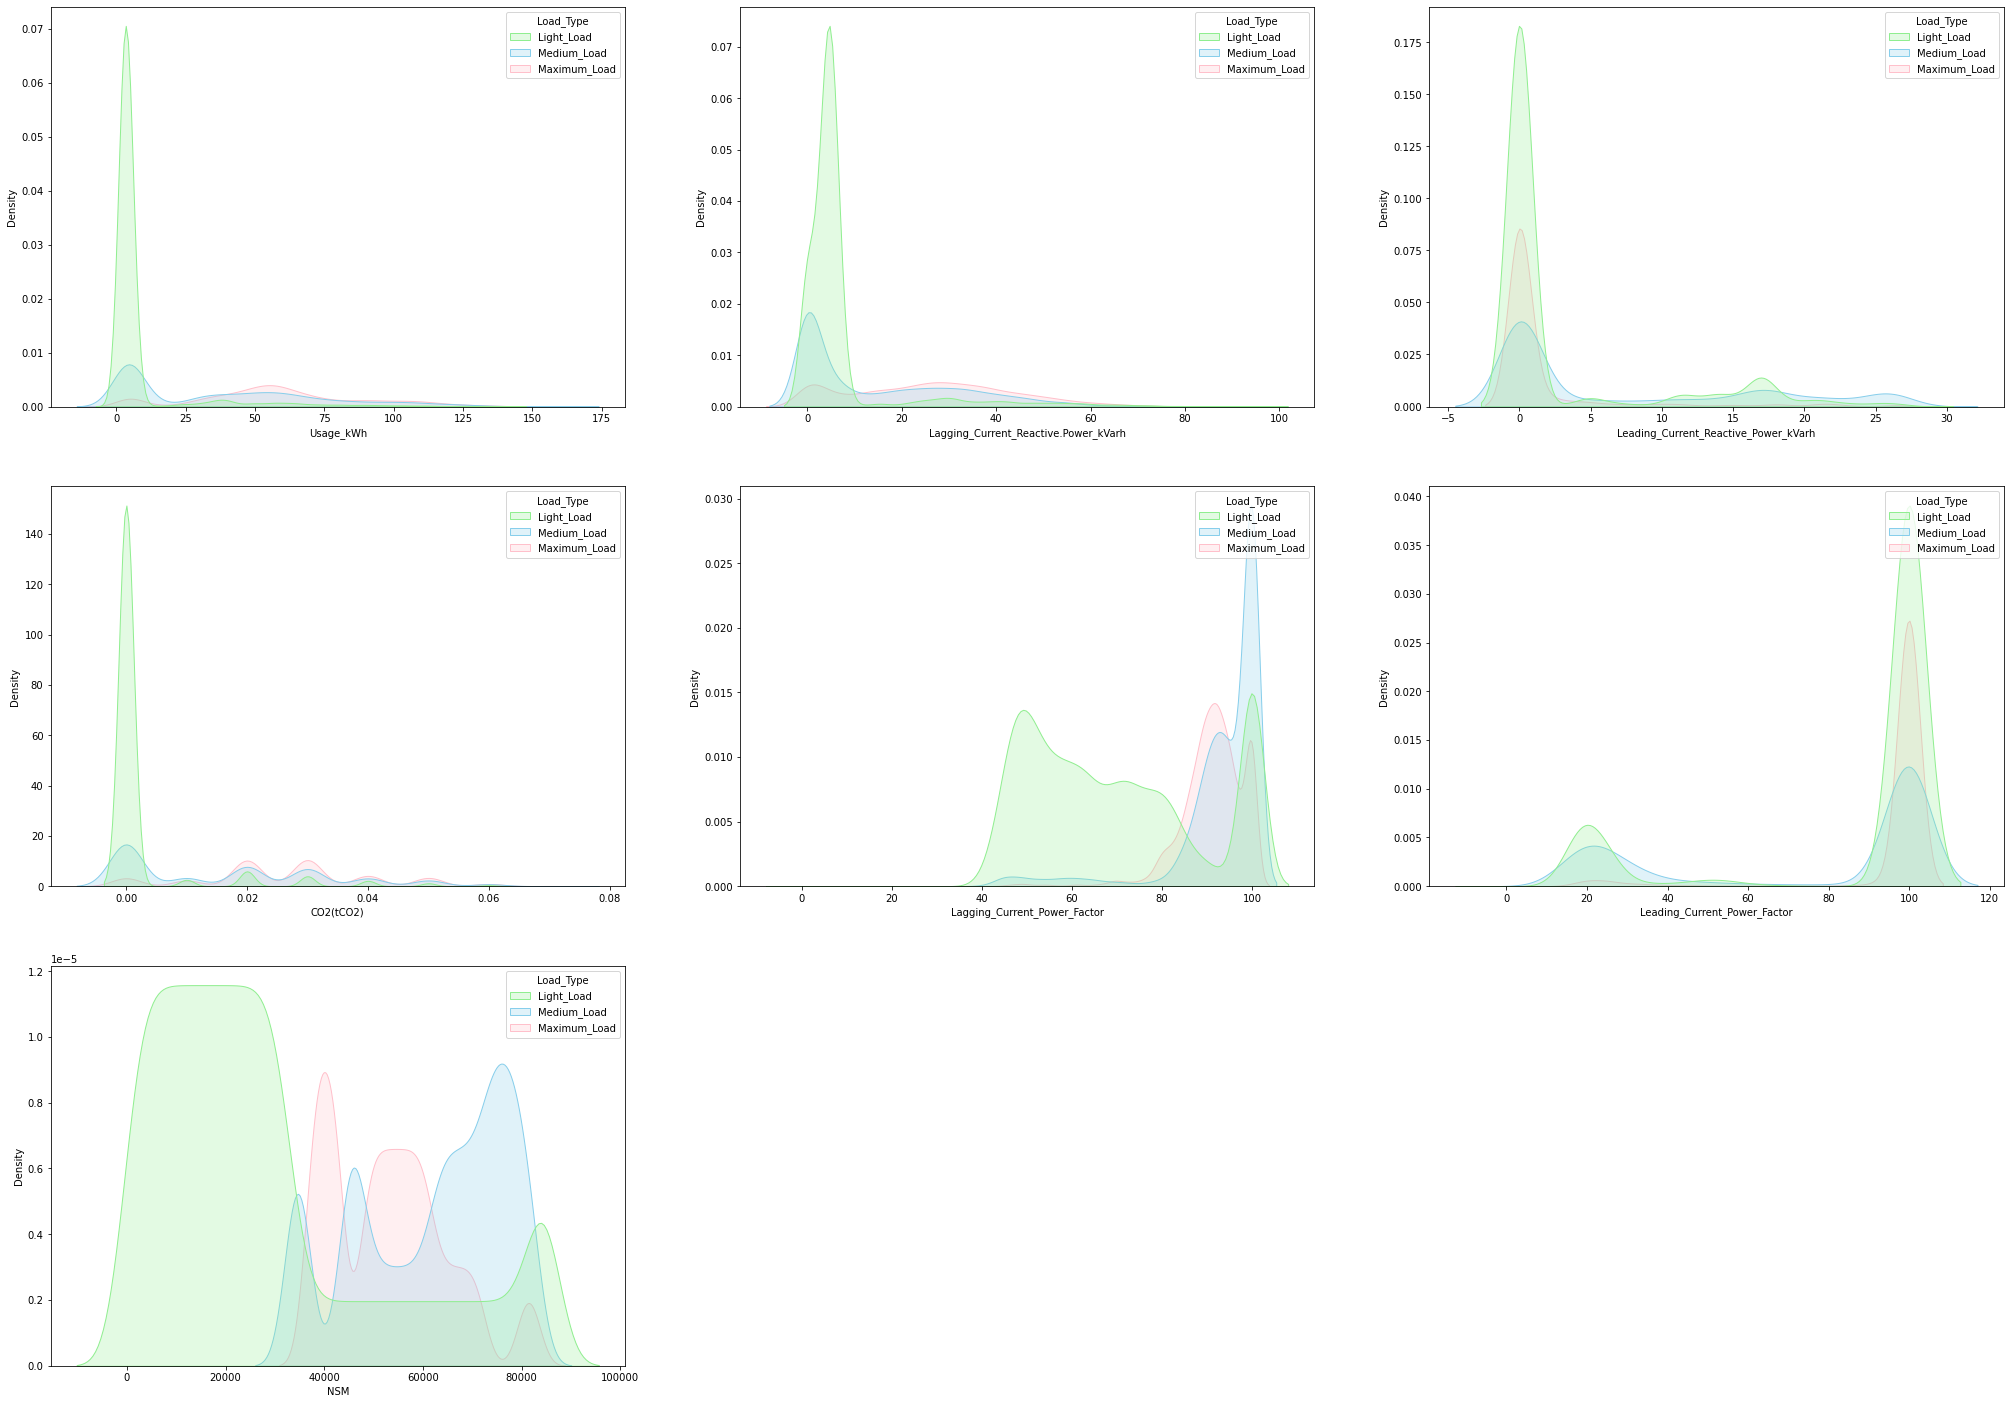

In [85]:
#Seeing Load_Type Relationship with Numerical data
plt.figure(figsize=(35,25))

for i,col in enumerate(df_num):    
    plt.subplot(3,3,i + 1)
    ax = sns.kdeplot(x=col, hue="Load_Type", data=df, shade=True,palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})

#### Seeing Usage Relationship with Numerical data

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


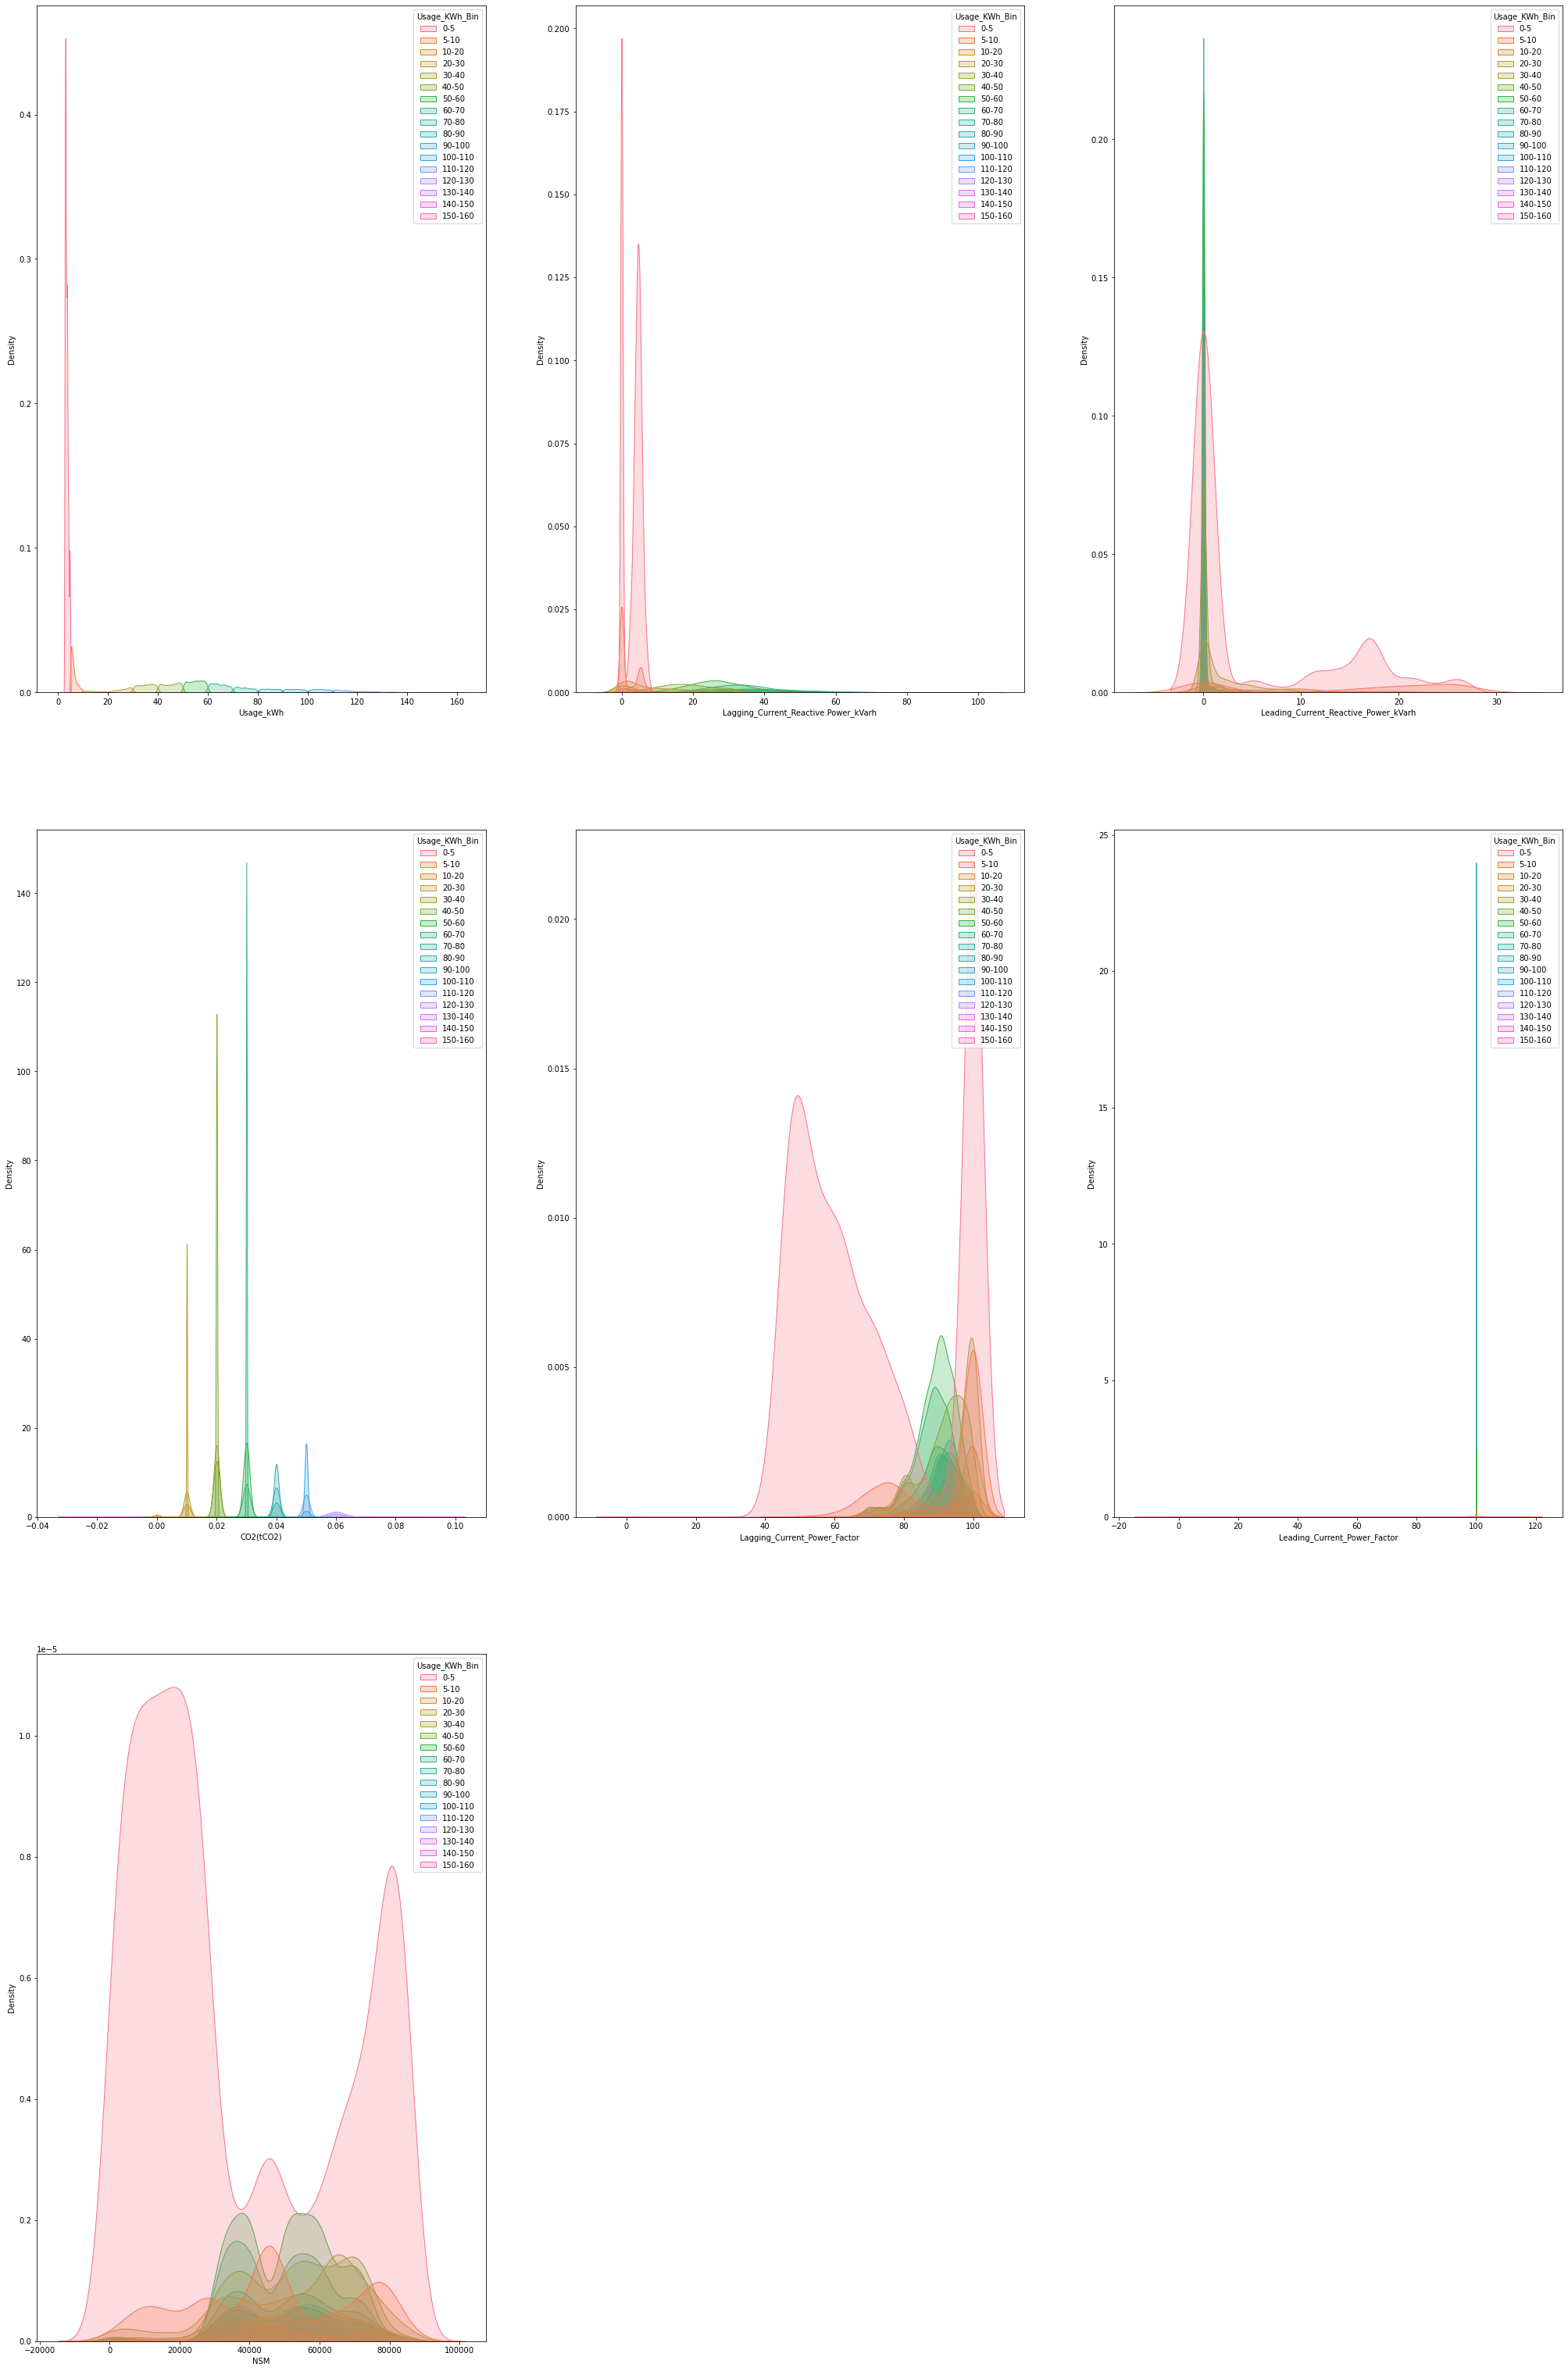

In [86]:
#Seeing Load_Type Relationship with Numerical data
plt.figure(figsize=(35,55))

for i,col in enumerate(df_num):    
    plt.subplot(3,3,i + 1)
    ax = sns.kdeplot(x=col, hue="Usage_KWh_Bin", data=df, shade=True)

<AxesSubplot:xlabel='Load_Type', ylabel='NSM'>

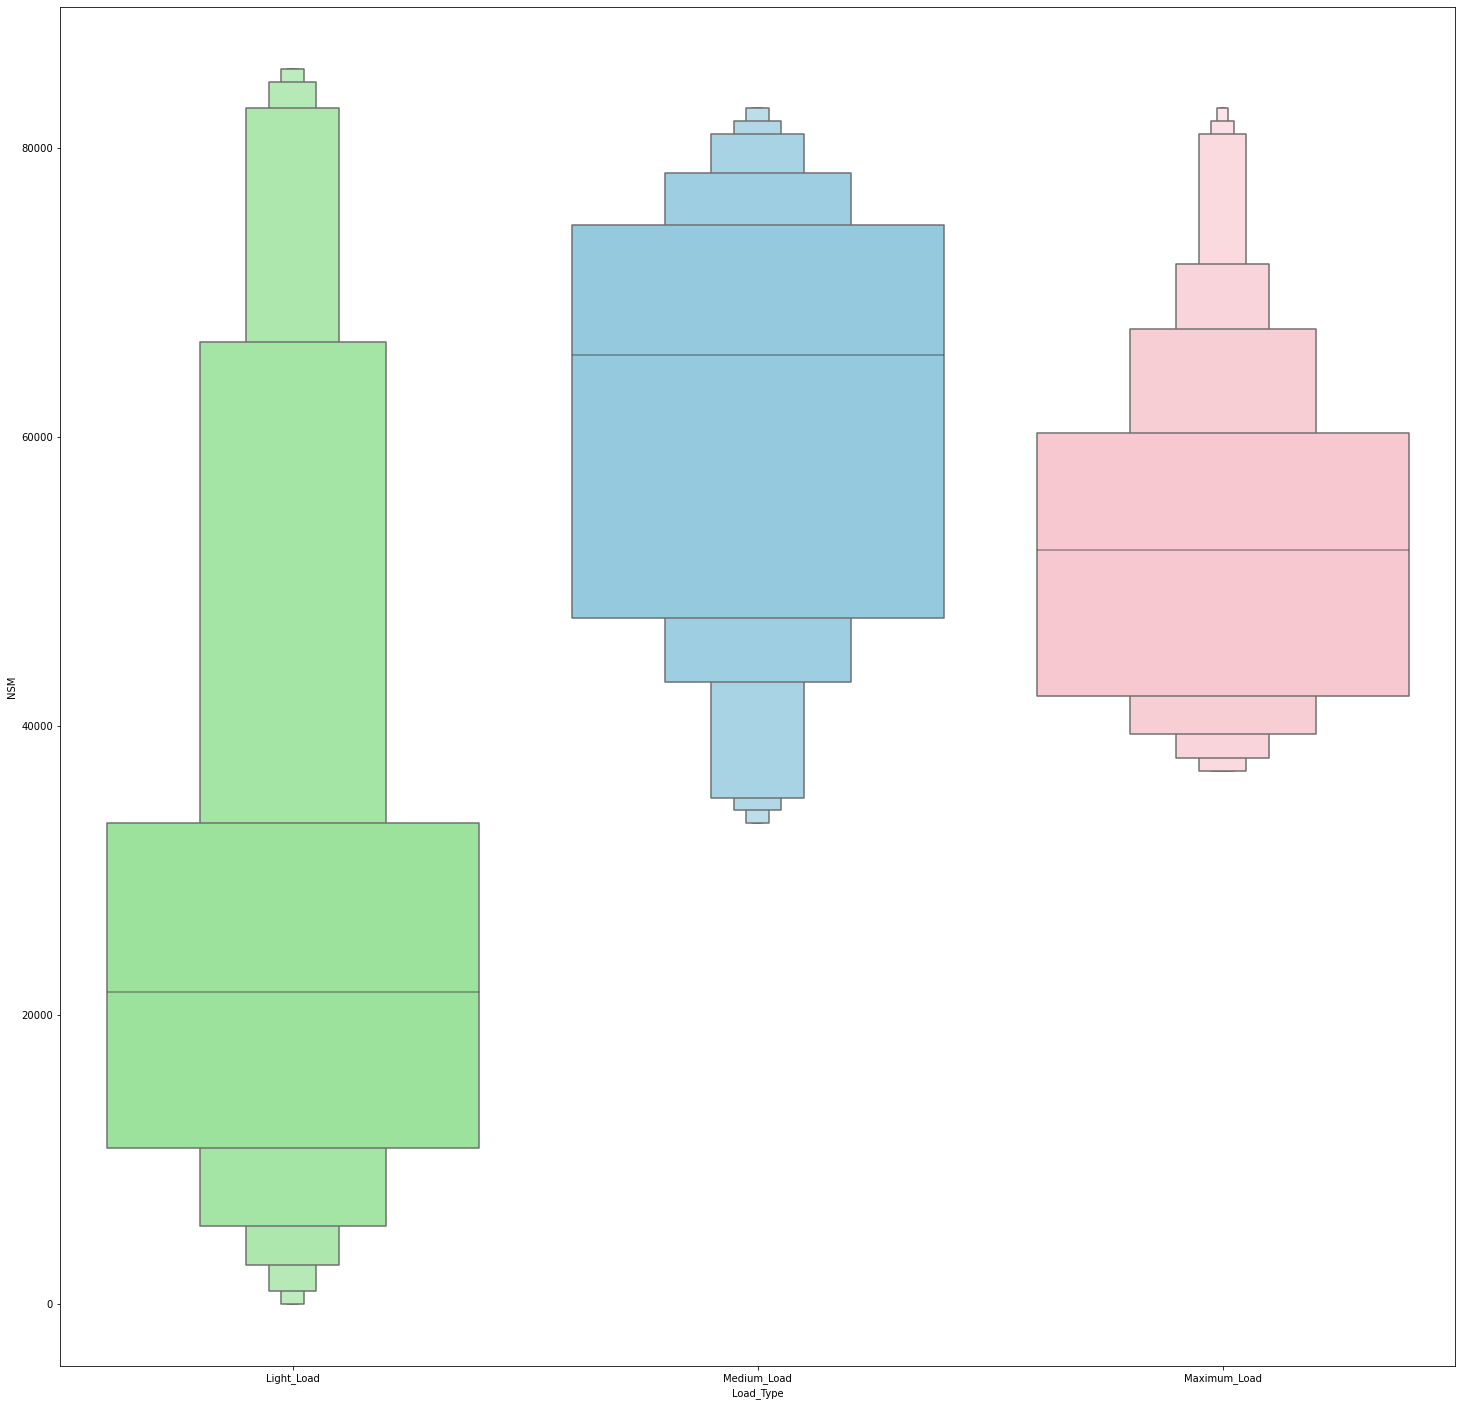

In [87]:
#View the NSM's relationship with the Load Type column
plt.figure(figsize=(25,25))
sns.boxenplot(x=df["Load_Type"] , y = df["NSM"] ,palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})

<AxesSubplot:xlabel='Usage_KWh_Bin', ylabel='NSM'>

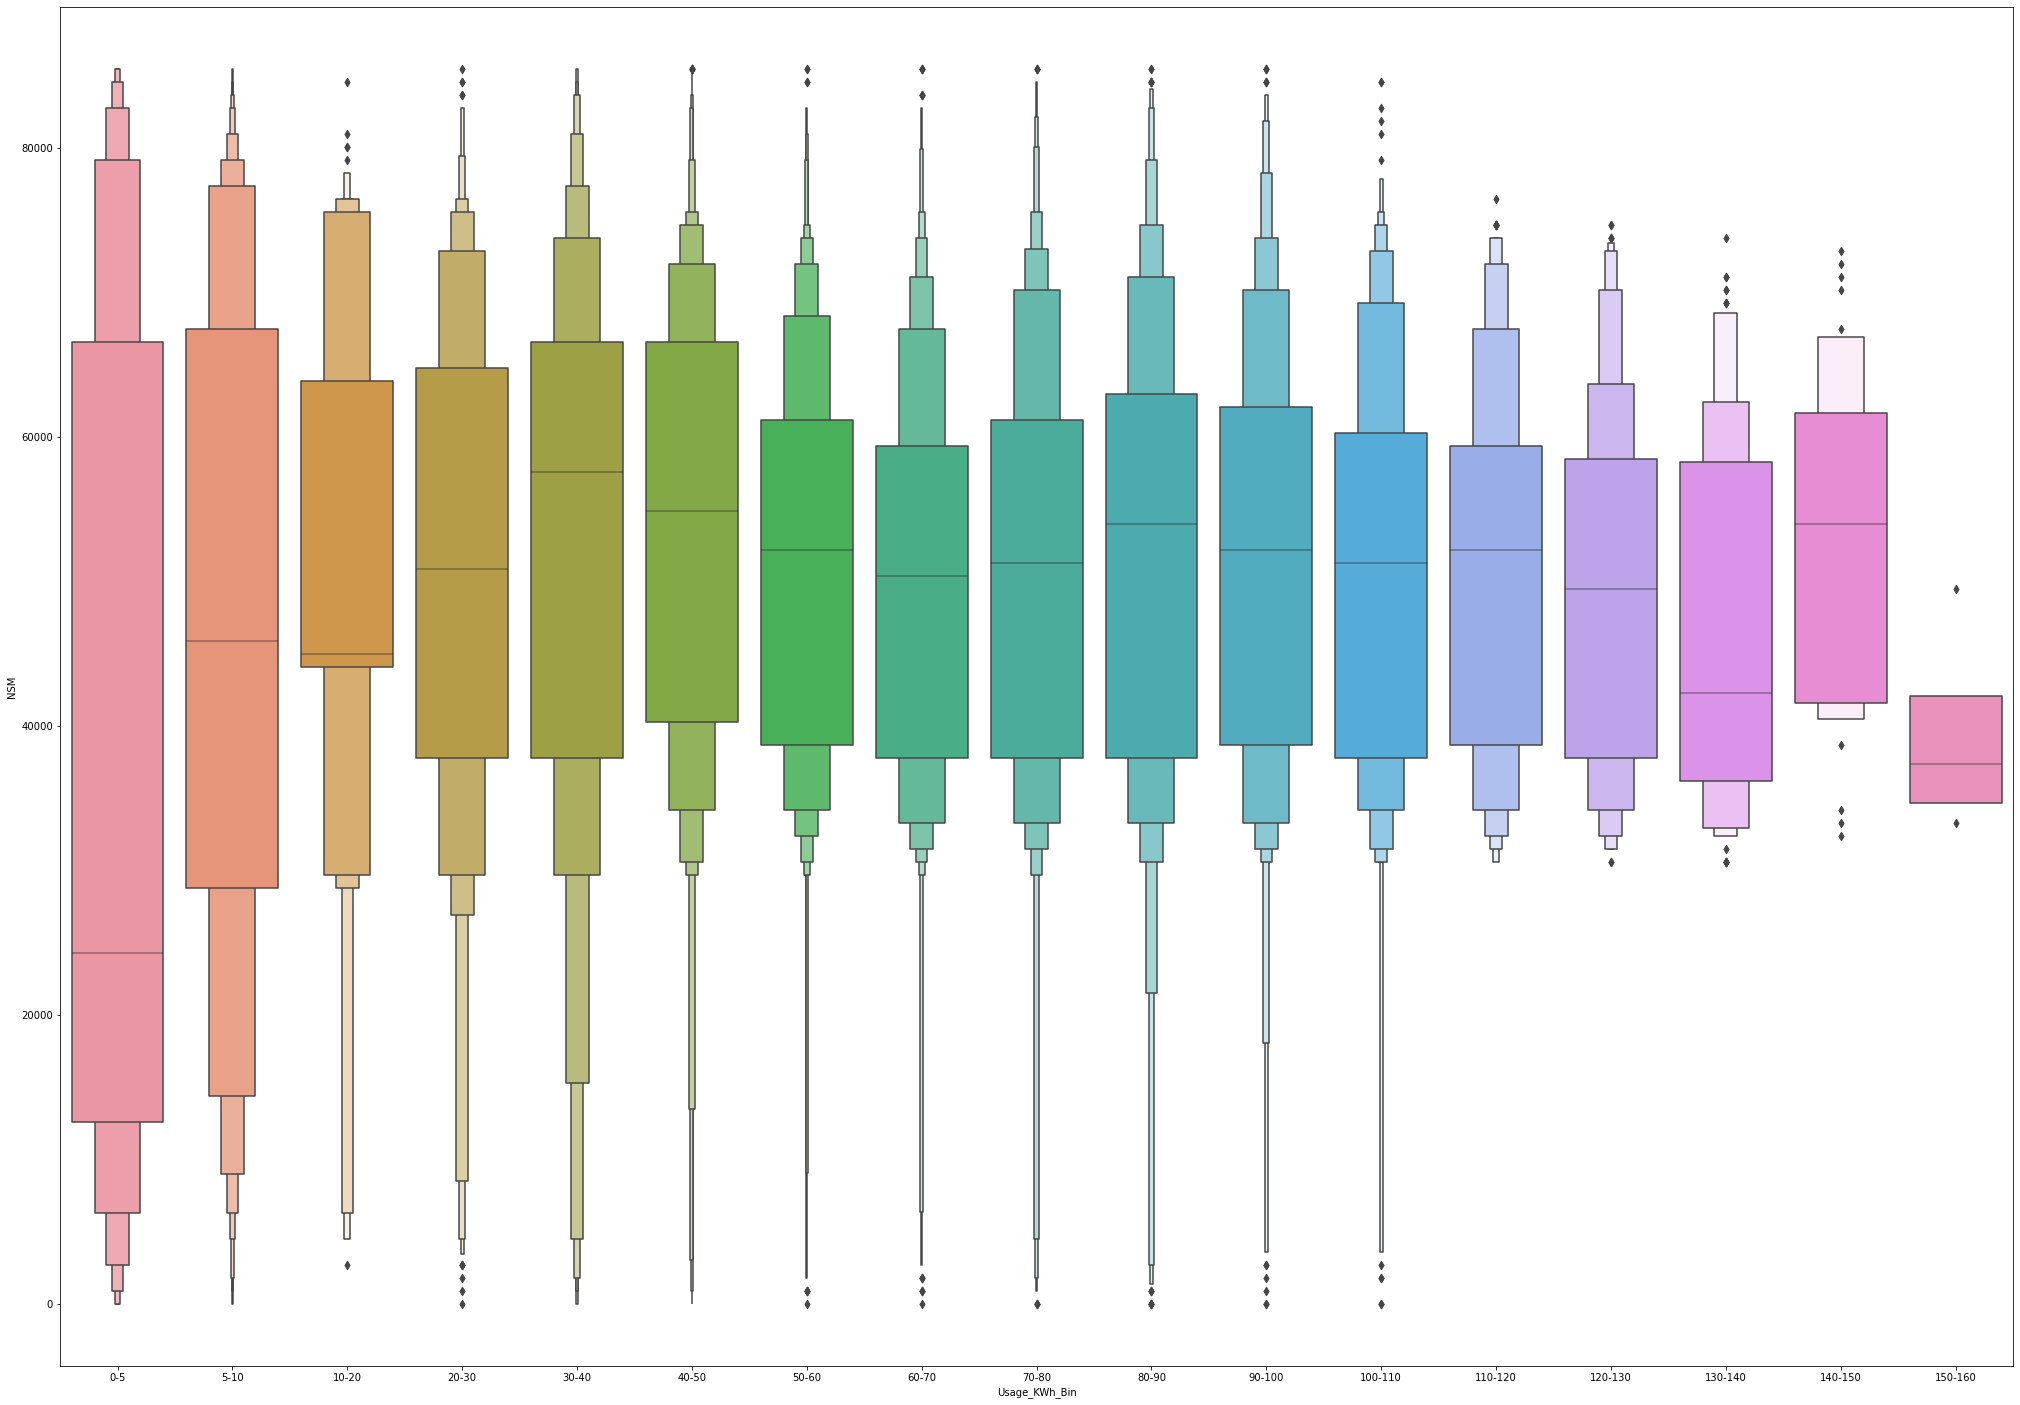

In [89]:
#View the NSM's relationship with the Usage column
plt.figure(figsize=(35,25))
sns.boxenplot(x=df["Usage_KWh_Bin"] , y = df["NSM"] )

#### View NSM relationships by day with the target column

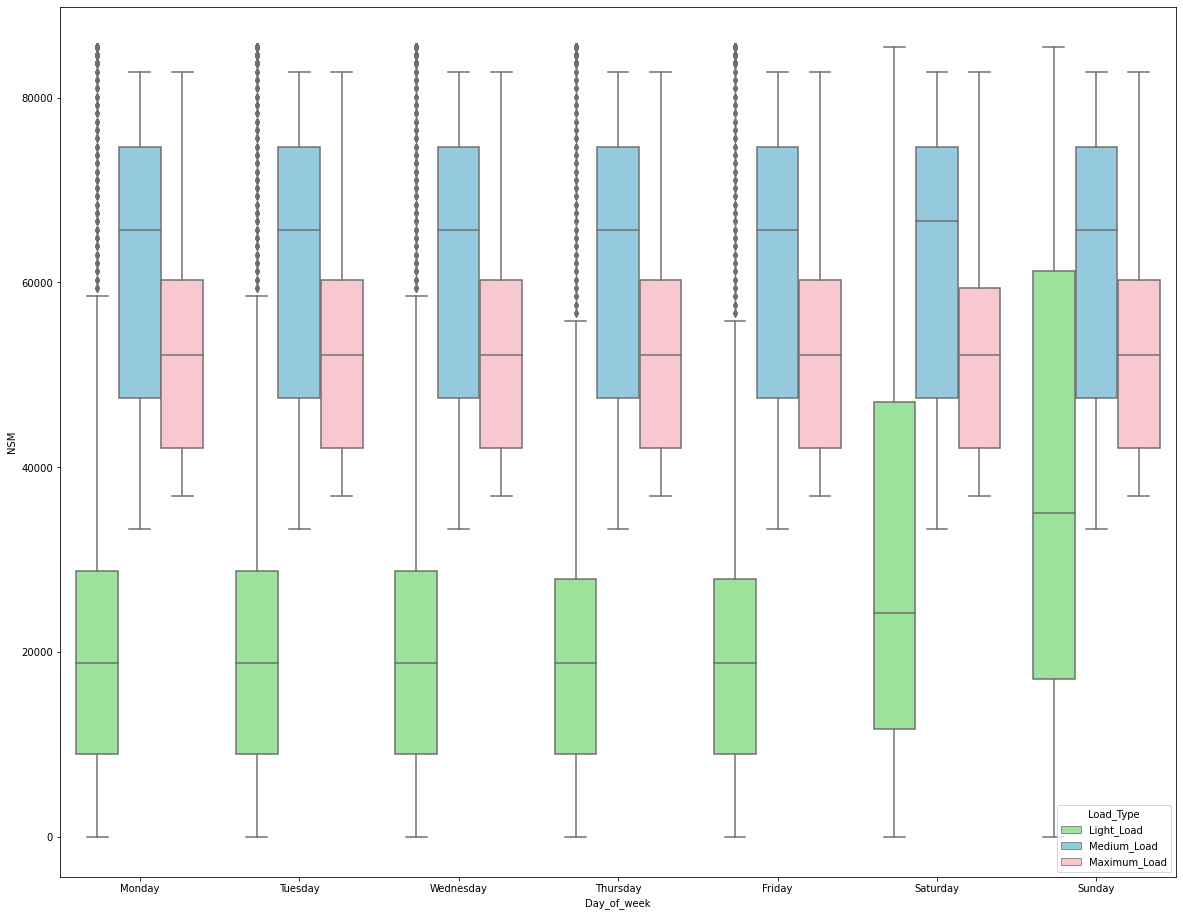

In [90]:

#View NSM relationships by day with the target column
plt.figure(figsize=(20,16))
sns.boxplot(x= df['Day_of_week'] , y= df['NSM'] ,hue= df["Load_Type"], palette= {"Light_Load":'lightgreen' , "Medium_Load":'skyblue', "Maximum_Load":'Pink'})
plt.show()

#### View NSM relationships by day with the Usage column

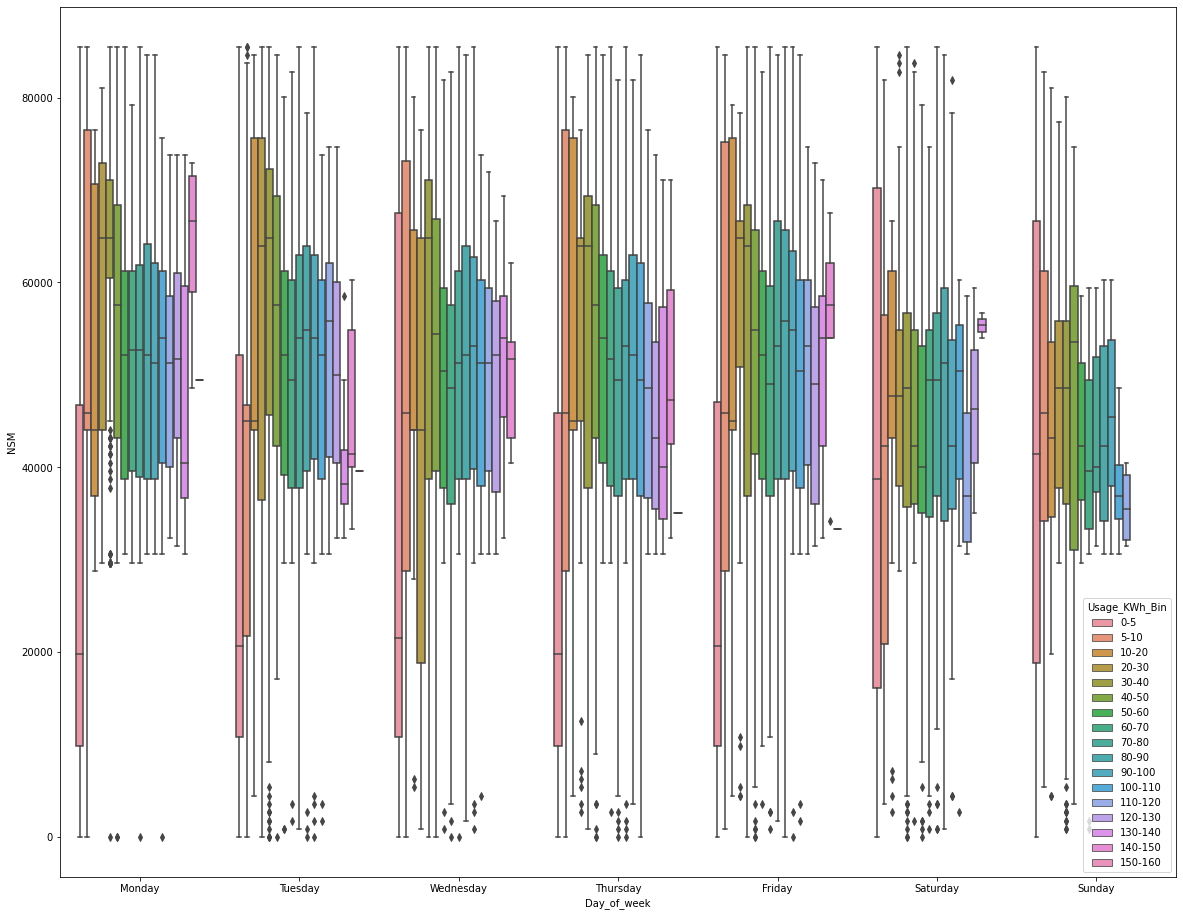

In [91]:
#View NSM relationships by day with the target column
plt.figure(figsize=(20,16))
sns.boxplot(x= df['Day_of_week'] , y= df['NSM'] ,hue= df["Usage_KWh_Bin"])
plt.show()

1. Seen from Usage_kWh, Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh and CO2(tCO2), when the value is low then Light Load tends to be more than other Load Types. But when it hits a value in the range of 0, Light Load has the least percentage among the others. When it hits a certain value (depending on each factor), Maximum Load has the most percentage among the other Load Types except for Leading_Current_Reactive_Power_kVarh. In Leading_Current_Reactive_Power_kVarh, when the value is > 10, Light Load still dominates, but when the value is > 20, Medium Load is the most dominant among the others. So, the greater the value of these four factors, the greater the energy burden or energy use.

2. When Lagging_Current_Power_Factor has a low value (range > 40 mA), Light Load seems to dominate compared to other Load Types. However, when it hits a value in the range of 90 mA, the situation changes drastically where Light Load has the smallest percentage among the other Load Types, while Maximum Load leads in that number. When the value is in the range of 100, Medium Load dominates the others. So that it can still be said that the bigger the energy load or energy use, but not to the maximum.

3. For Leading_Current_Power_Factor, it can be seen that Light Load always dominates at any value. So you could say that the greater the Leading_Current_Power_Factor value, the smaller the energy load or usage, because when the Leading_Current_Power_Factor value is greater, the percentage of the Light Load becomes the largest percentage among the other Load Types.

4. In NSM it can be seen that the greater the value, the smaller the percentage of Light Load, although at certain values ​​it seems to be rising again, but graphically you can say it is decreasing. At values ​​> 25000, Medium and Maximum Load seem to dominate. However, the greater the NSM value, the greater the Medium Load percentage. So it can be concluded that the greater the NSM value, the greater the energy burden on energy use data, but not to the maximum limit.

#### Pair Plot

A pair plot, also known as a scatterplot matrix, is a visualization technique that shows the relationships between multiple variables in a dataset. In a pair plot, each variable in the dataset is plotted against every other variable in the dataset, resulting in a matrix of scatterplots. The diagonal of the matrix usually shows a histogram or a kernel density plot of the variable itself.

Pair plots are useful for exploring the correlations between variables and identifying patterns in the data. They can also be used to identify outliers or unusual observations that may need further investigation.

Python's Seaborn library provides a convenient function, sns.pairplot(), for creating pair plots.

<Figure size 792x648 with 0 Axes>

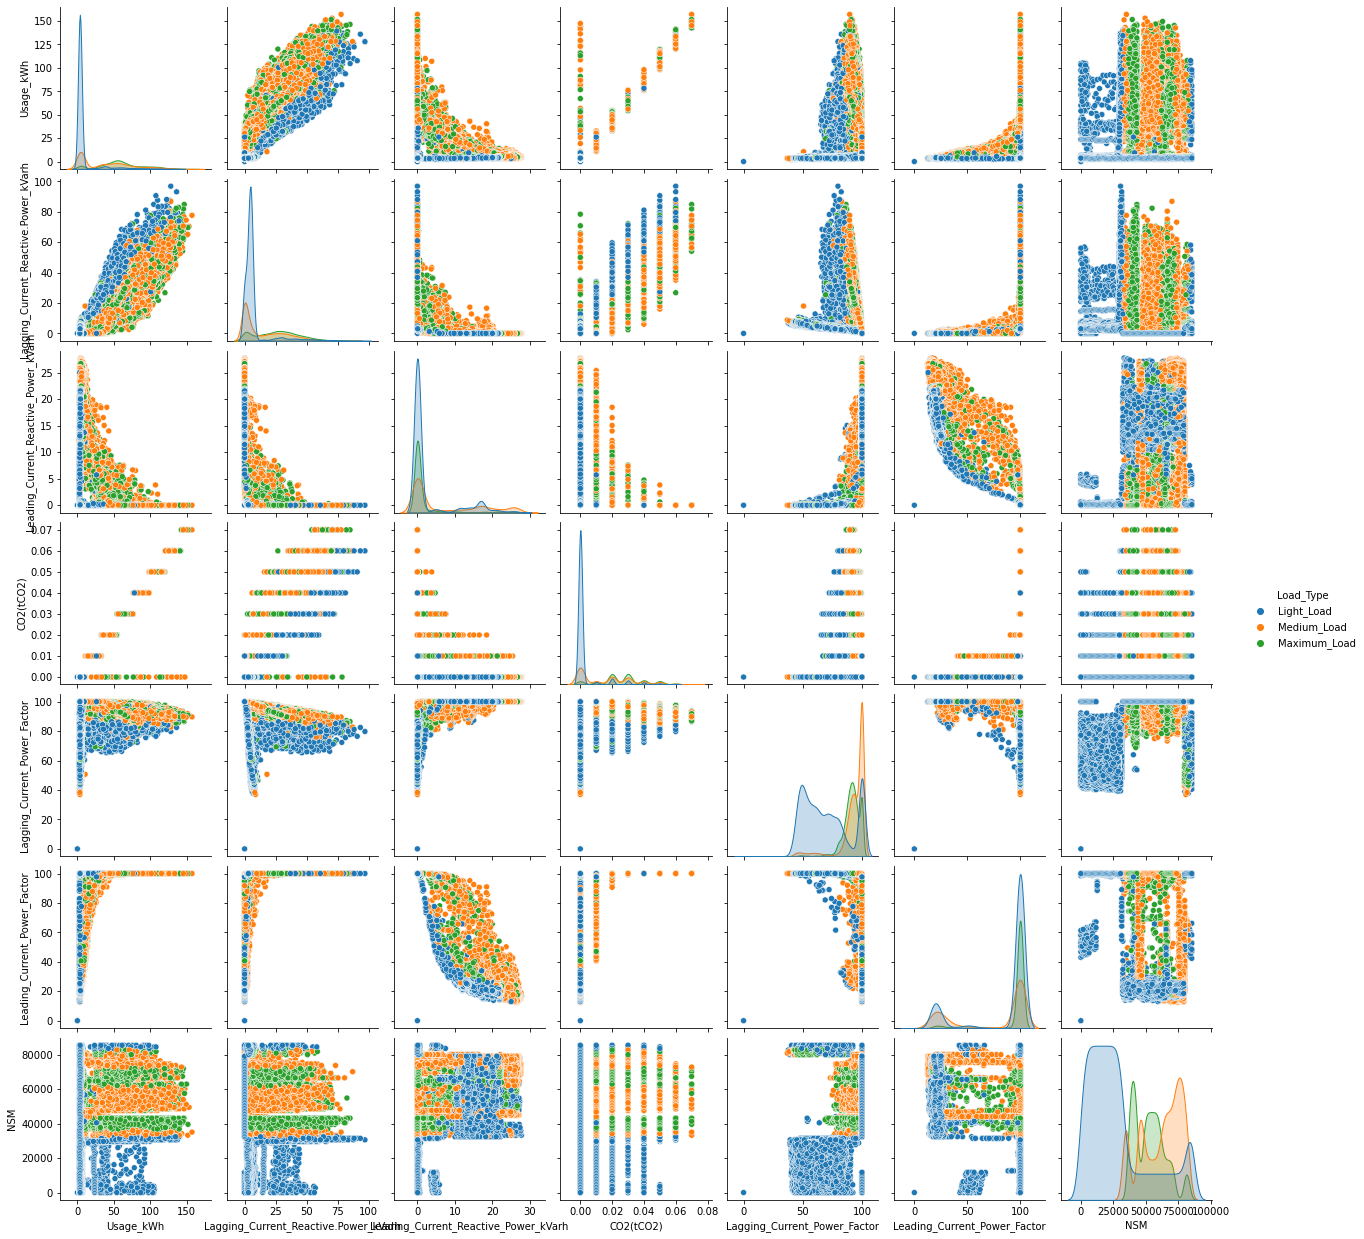

In [92]:
#Create a Pair Plot Graph
plt.figure(figsize=(11,9))
sns.pairplot(df,hue = 'Load_Type')
plt.show()

<Figure size 792x648 with 0 Axes>

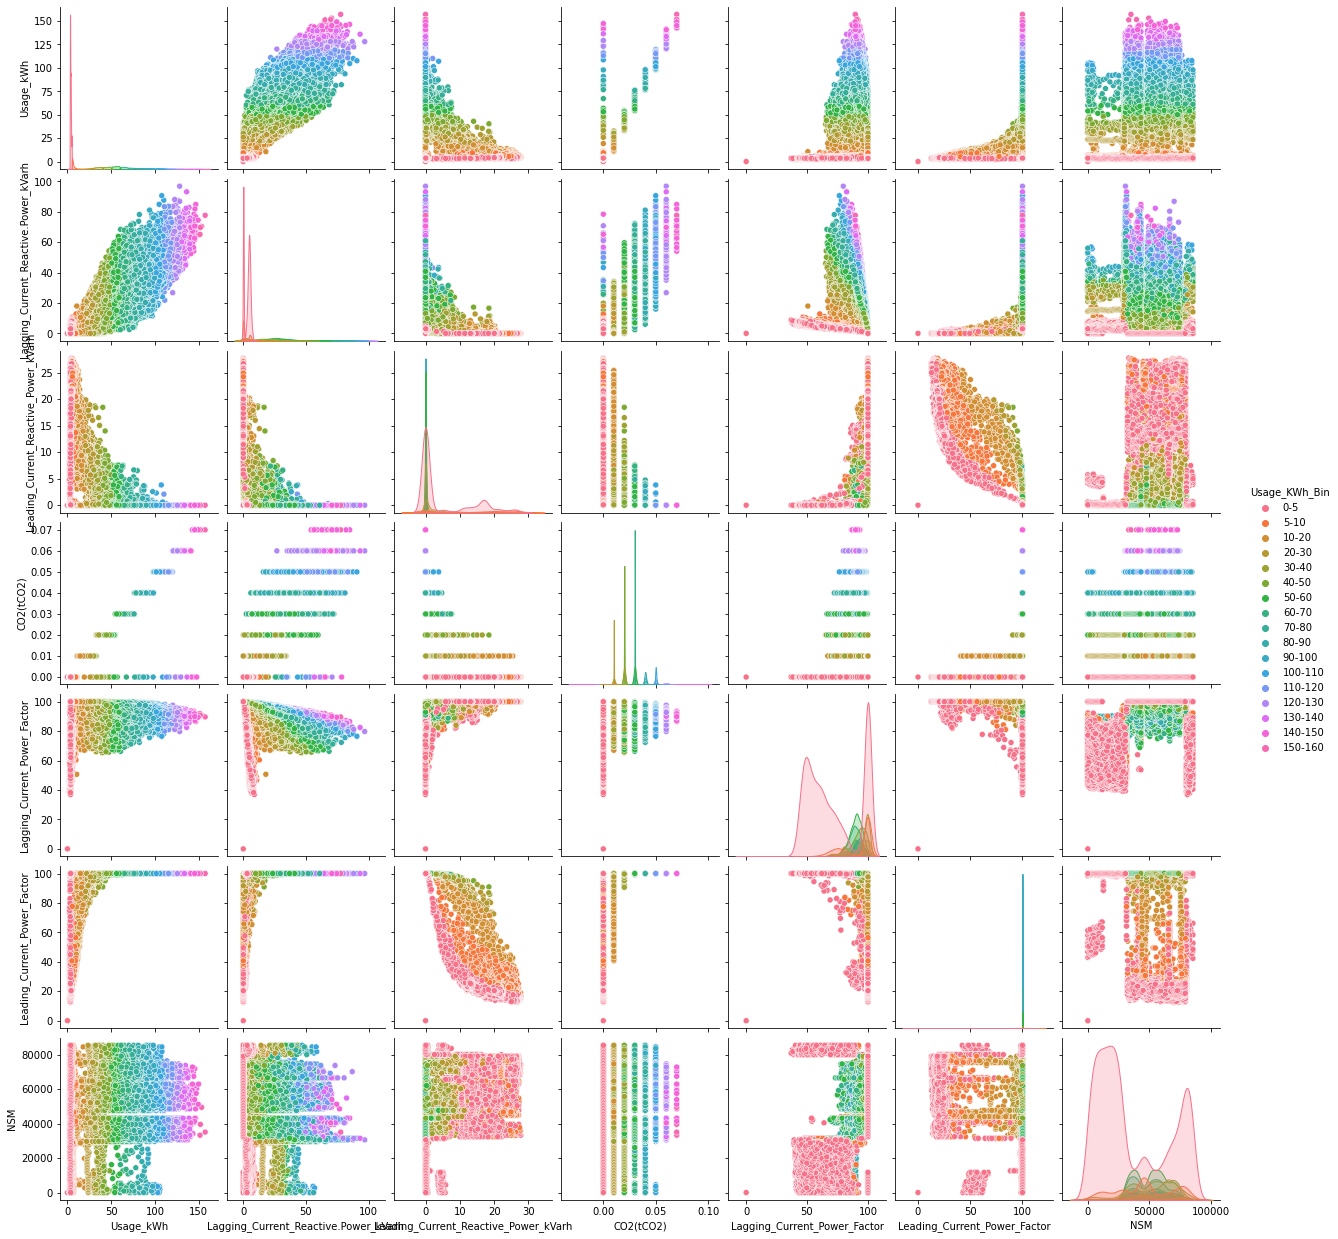

In [94]:
#Create a Pair Plot Graph
plt.figure(figsize=(11,9))
sns.pairplot(df,hue = 'Usage_KWh_Bin')
plt.show()

### Insight:
1. The relationship between Usage_kWh and Lagging_Current_Reactive.Power_kVarh is quite linear, the higher the kWh usage, the higher the Lagging_Current_Reactive.Power_kVarh
2. Usage_kWh and Leading_Current_Reactive_Power_kVarh are quite linear down, the higher the kWh usage, the lower the Leading_Current_Reactive_Power_kVarh value
3. Usage_kWh and CO2 also look quite linear, but when the CO2 level is at the minimum value, the usage kWh has an even distribution of values ​​(from minimum to maximum it is at one constant value of CO2 levels).
4. In Usage_kWh and Lagging_Current_Power_Factor there is a point where it is the point with the minimum value of the two variables. The relationship between these two variables is quite linear, where at a certain point the Lagging_Current_Power_Factor value shows the higher the Lagging_Current_Power_Factor value, the higher the usage_kWh value.
5. Usage_kWh and Leading_Current_Power_Factor look quite linear, but when the maximum value of Leading_Current_Power_Factor is, the value of usage_kWh is evenly distributed (from minimum to maximum it is one constant value of Leading_Current_Power_Factor), the higher the Leading_Current_Power_Factor value, the higher the usage kWh value.
6. Usage_kWh and NSM have a fairly linear upward graph, but when NSM reaches its maximum value, usage_kWh becomes lower than before.
7. The relationship of Lagging_Current_Reactive.Power_kVarh with other variables is almost the same as the relationship of usage_kWh above, which differs only in the NSM variable. The difference is that the data distribution is not very linear, but it is still the same as the usage_kWh above, when a certain Lagging_Current_Reactive.Power_kVarh value and the value is higher, the usage_kWh value is actually lower.
8. The relationship between Leading_Current_Reactive_Power_kVarh and CO2 seems quite linear downward, the higher the CO2 level, the lower the Leading_Current_Reactive_Power_kVarh value.
9. Leading_Current_Reactive_Power_kVarh with Lagging_Current_Power_Factor looks also quite linear up, the higher the value of Leading_Current_Reactive_Power_kVarhmaki the higher the value of Lagging_Current_Power_Factor.
10. For Leading_Current_Reactive_Power_kVarh with Leading_Current_Power_Factor, the graph shows a downward linear trend where the higher the Leading_Current_Power_Factor value, the lower the Leading_Current_Reactive_Power_kVarh value.
11. In Leading_Current_Reactive_Power_kVarh and NSM, it can be seen that in certain values ​​of NSM, the distribution of Leading_Current_Reactive_Power_kVarh data tends to be stable, meaning that when the NSM value is higher, the Leading_Current_Reactive_Power_kVarh value is evenly distributed (from minimum to maximum)
12. Leading_Current_Power_Factor with CO2 looks like a linear upward graph, but when the Leading_Current_Power_Factor value is at its maximum, the distribution of data/CO2 levels is evenly distributed (there is a minimum to a maximum value)
13. CO2 and NSM have a similar relationship with Usage kWH and NSM, but the correlation between CO2 and NSM levels shows that the data is more tenuous.
14. The relationship between CO2 levels and Lagging_Current_Power_Factor graphically looks linear upwards, the higher the CO2 level, the higher the Lagging_Current_Power_Factor value
15. It can be seen in the graph that when the Lagging_Current_Power_Factor value is maximum, the Leading_Current_Power_Factor value also reaches the maximum
16. When the NSM value is minimum to maximum, there is a maximum Lagging_Current_Power_Factor value at each point of the NSM value.
17. Just like the NSM relationship with Lagging_Current_Power_Factor, the NSM relationship with Leading_Current_Power_Factor also has a maximum value of Leading_Current_Power_Factor at each point of the NSM value.

##### Looking for what factors trigger the maximum load

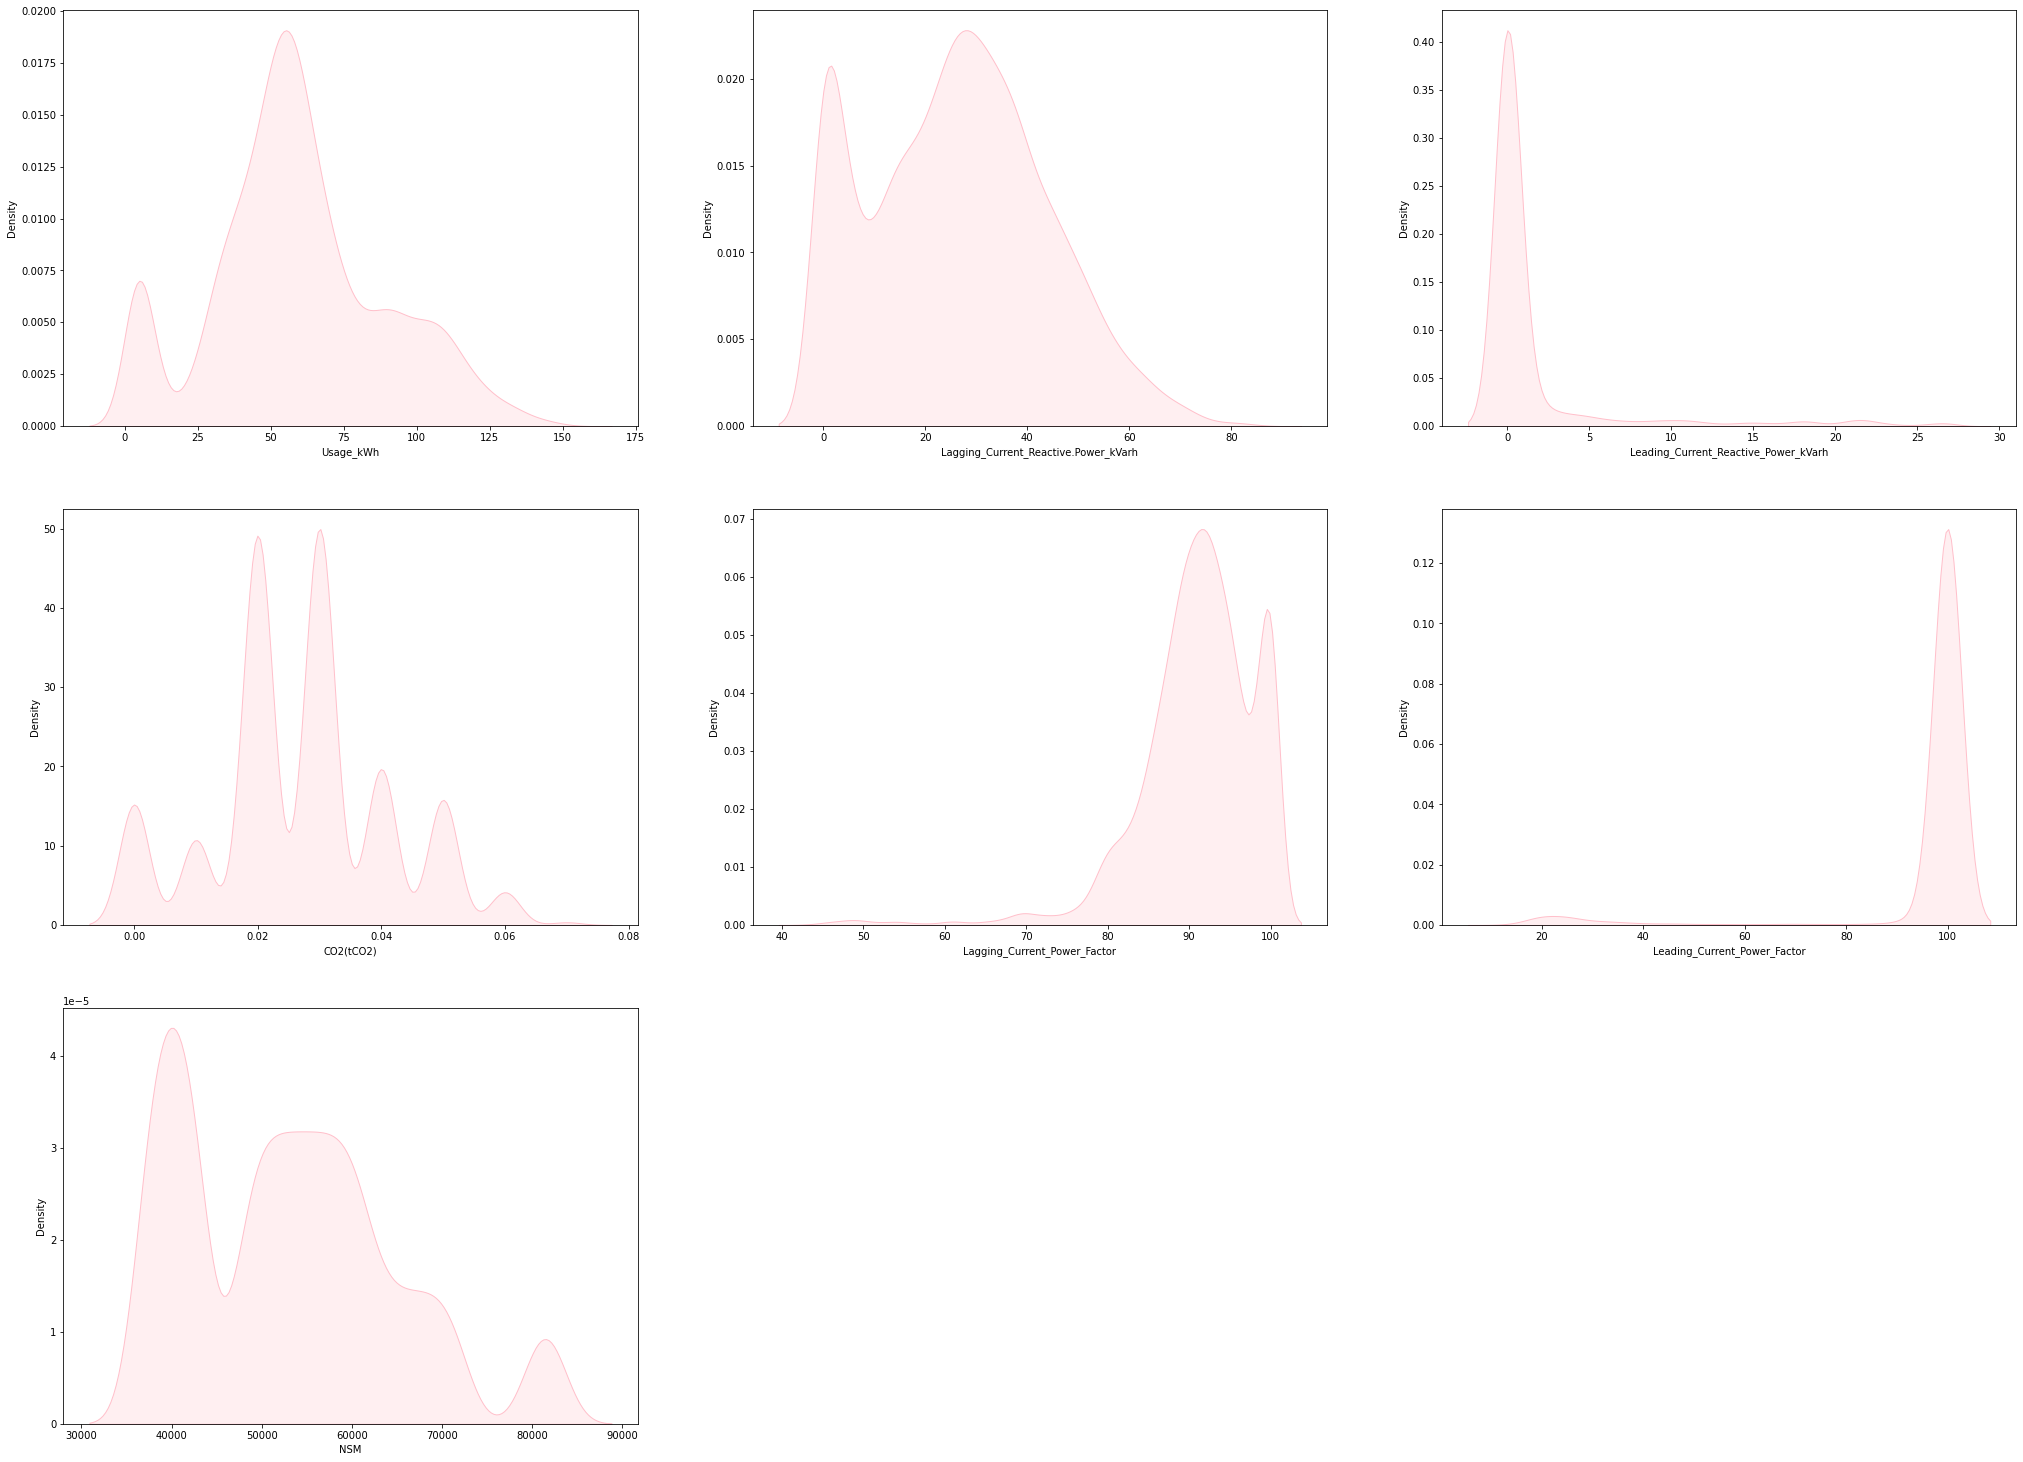

In [101]:
df_max=df[df['Load_Type']=='Maximum_Load']
df_light=df[df['Load_Type']=='Light_Load']
df_med=df[df['Load_Type']=='Medium_Load']
plt.figure(figsize=(35,26))
for i,col in enumerate(df_num):    
    plt.subplot(3,3,i + 1)
    ax = sns.kdeplot(x=col,data=df_max, shade=True,color='Pink')

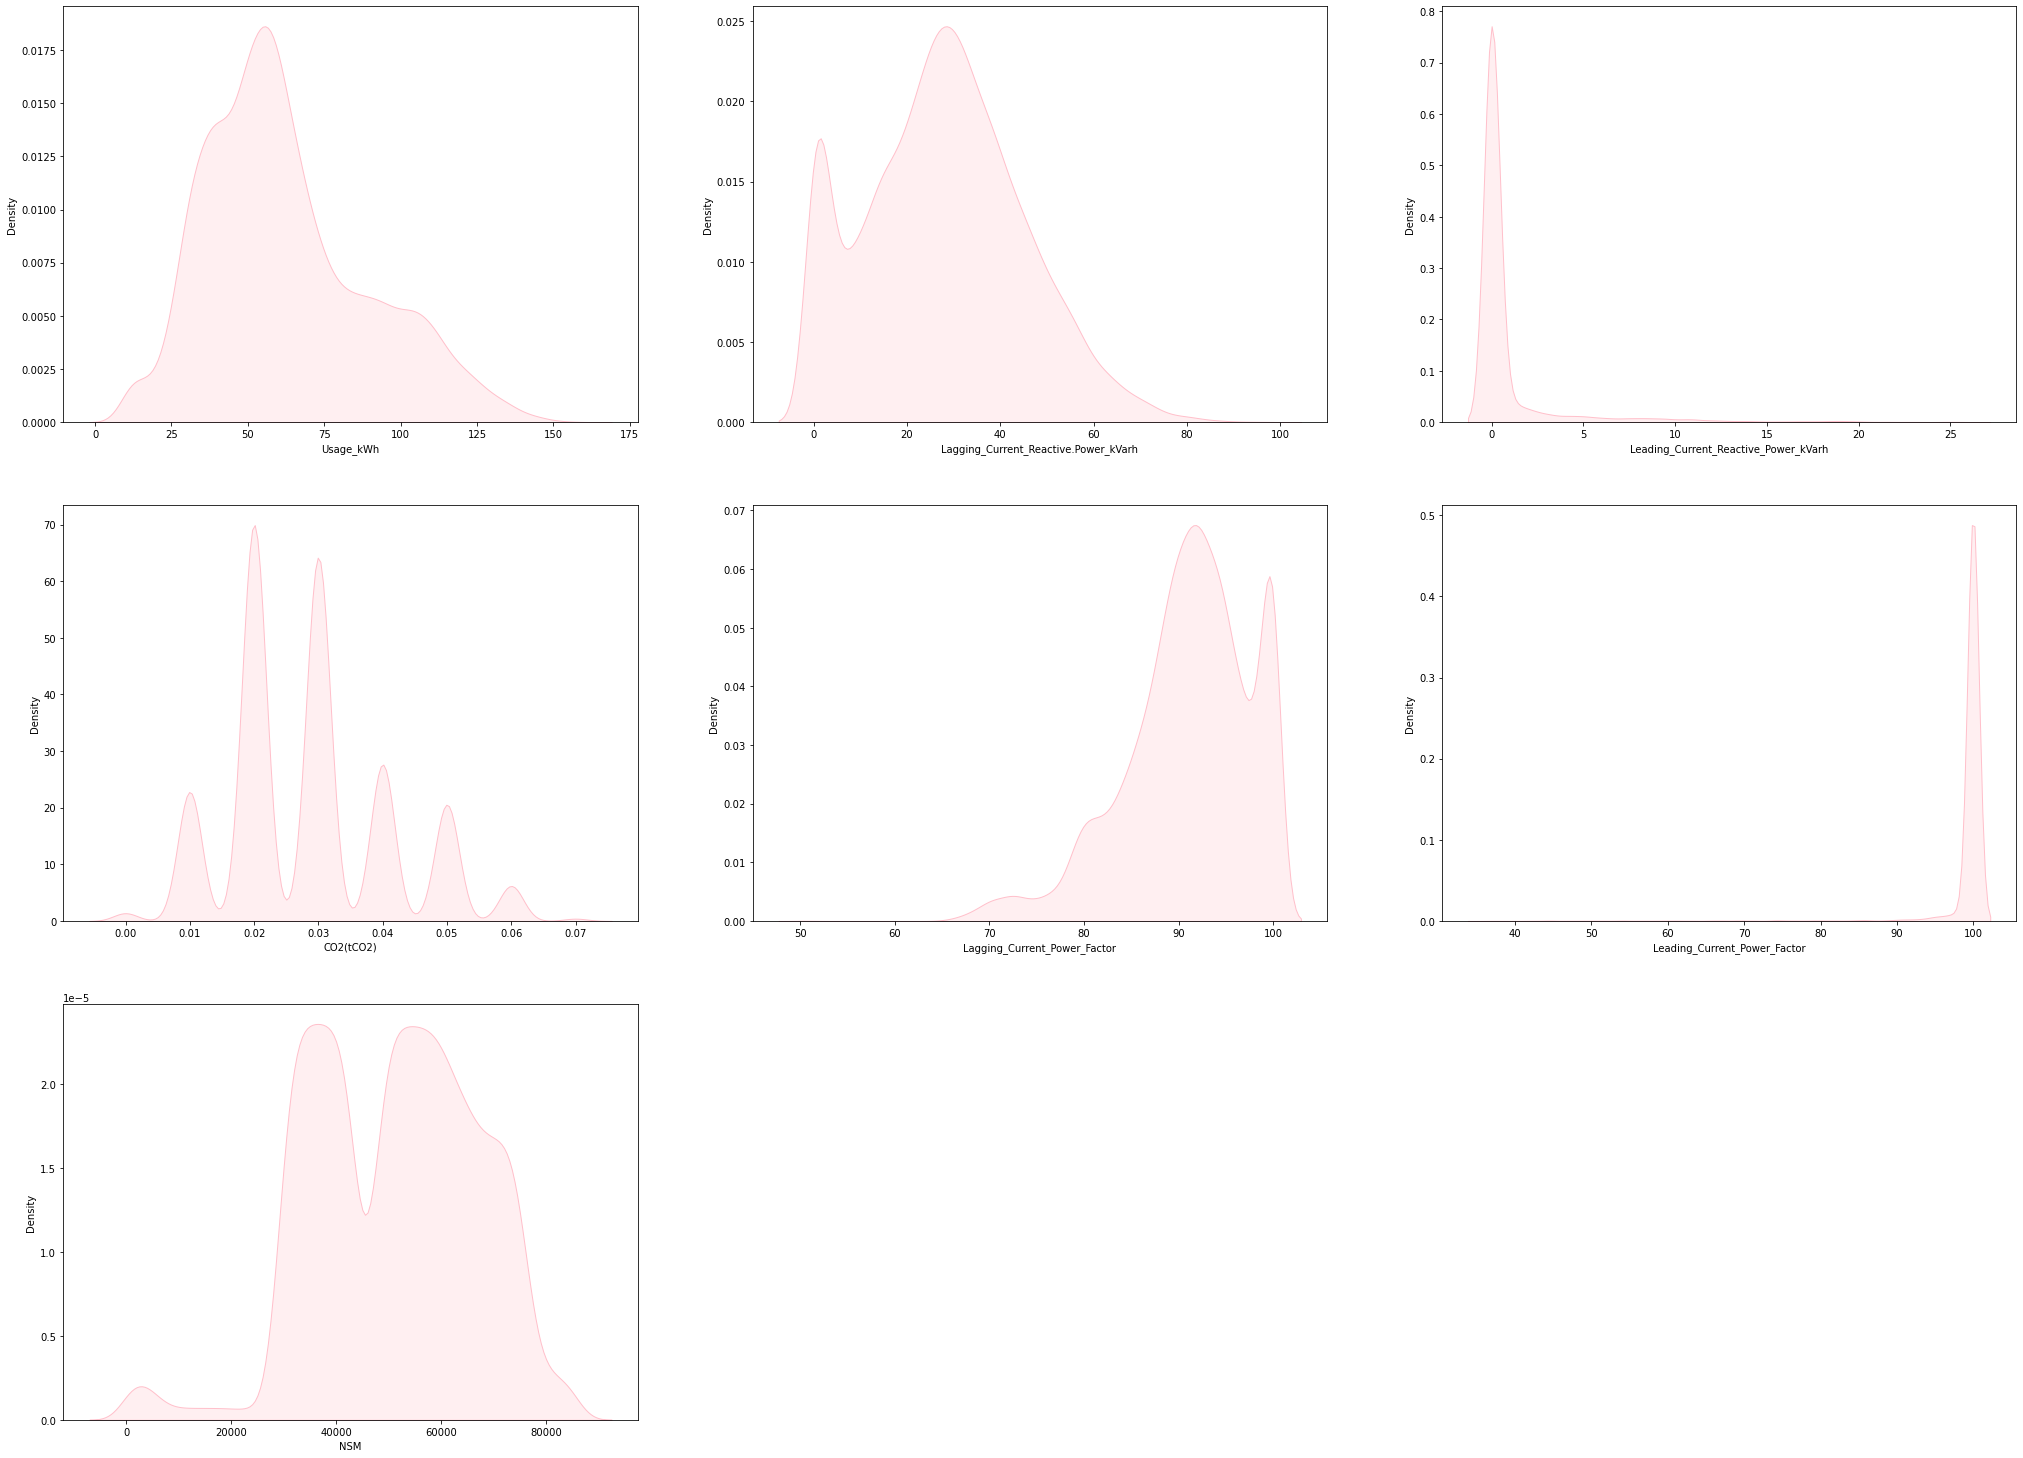

In [102]:
df_Usage_max=df[df['Usage_kWh'] > 10]
plt.figure(figsize=(35,26))
for i,col in enumerate(df_num):    
    plt.subplot(3,3,i + 1)
    ax = sns.kdeplot(x=col,data=df_Usage_max, shade=True,color='Pink')

##### Insight
Seen from the two graphs above, usage_kWh, Lagging_Current_Reactive.Power_kVarh and CO2, have a tendency to increase at maximum load. It can be seen that these 3 factors have a fairly high graph on the maximum load

In [103]:
#analyze of energy consumption and NSM based on load type, day of week
pd.pivot_table(df, index = ['Load_Type', 'Day_of_week'], values = ['NSM', 'Usage_kWh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean}).sort_values(by=['NSM', 'Usage_kWh'],ascending=False)

NSM  Usage_kWh
Load_Type    Day_of_week                         
Medium_Load  Saturday     62218.421053  17.547648
             Sunday       61967.647059  16.368934
             Thursday     61758.000000  44.986200
             Monday       61758.000000  43.097231
             Friday       61758.000000  42.220494
             Tuesday      61705.102041  45.020797
             Wednesday    61705.102041  40.462379
Maximum_Load Tuesday      53176.530612  66.023359
             Wednesday    53176.530612  62.358359
             Monday       53106.000000  66.278233
             Thursday     53106.000000  64.522758
             Friday       53106.000000  61.043700
             Sunday       52826.470588  29.195662
             Saturday     52492.105263  41.529605
Light_Load   Sunday       39144.653465   4.171106
             Saturday     31381.843575   7.072210
             Wednesday    24074.199288  10.780560
             Tuesday      24074.199288  10.510040
             Monday       24026.223776   8.805459
             Thursday     23206.204380  11.803964
             Friday       23206.204380  11.361442

## CONCLUSION  (EDA)

## Regression Model
### Loading the Data: We are going to consider 'Usage_KWh' as target/response variable for Linear Regression Model.

1. Based on the analysis and graph above, NSM is the most influential factor on energy load.
2. Usage_kWh, Lagging_Current_Reactive.Power_kVarh and CO2 trigger energy load which is classified as maximum load
3. The closer the sunday / weekend, the lighter the energy load

### Outlier treatment: If there is any outlier we need to remove them as presence of outliers in model affects the prediction accuracy.

In [150]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Shift', 'Usage_KWh_Bin'],
      dtype='object')

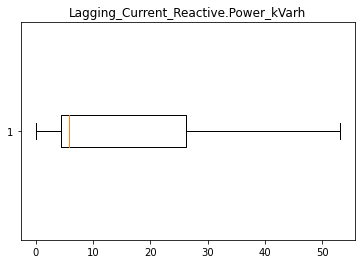

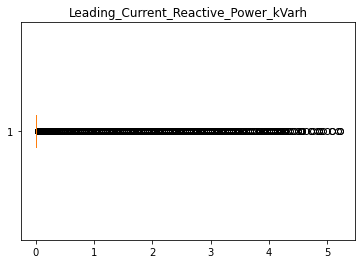

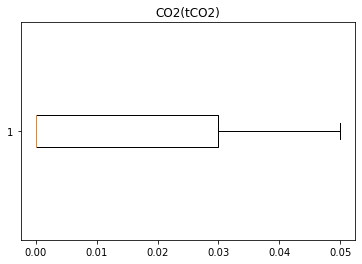

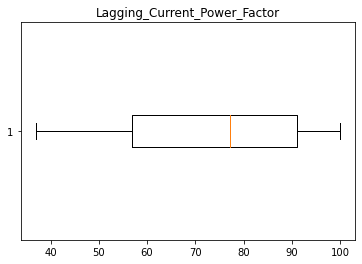

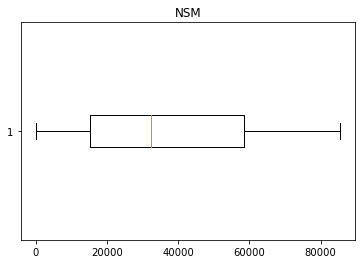

In [151]:
## Checking outlier by looking at BoxPlot of Numerical Variables
plt.boxplot(x=df['Lagging_Current_Reactive.Power_kVarh'],vert=False)
plt.title('Lagging_Current_Reactive.Power_kVarh')
plt.show()

plt.boxplot(x=df['Leading_Current_Reactive_Power_kVarh'],vert=False)
plt.title('Leading_Current_Reactive_Power_kVarh')
plt.show()

plt.boxplot(x=df['CO2(tCO2)'],vert=False)
plt.title('CO2(tCO2)')
plt.show()

plt.boxplot(x=df['Lagging_Current_Power_Factor'],vert=False)
plt.title('Lagging_Current_Power_Factor')
plt.show()

plt.boxplot(x=df['NSM'],vert=False)
plt.title('NSM')
plt.show()


The boxplots of 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh','CO2(tCO2)', 'Lagging_Current_Power_Factor' show that there are outlier present in the data.

In [153]:
## Number of rows before outlier removal
r1=len(df)
r1

25496

## Removing Outliers

In [154]:
## Defining function to get outliers
def outliers(data,feature):

   Q1=df[feature].quantile(0.25)

   Q3=df[feature].quantile(0.75)

   IQR=Q3-Q1

   Lower_boundary=Q1-1.5*IQR
    
   Upper_boundary=Q3+1.5*IQR

   outliers_list = df.index[(df[feature]<(Q1-1.5*IQR)) | (df[feature]>(Q3+1.5*IQR))]

   return outliers_list

In [155]:
# Create an empty list to store the output indices  from mulitple cols
index_list=[]
for feature in ['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']:
    index_list.extend(outliers(df,feature))

In [140]:
index_list

[140,
 141,
 142,
 143,
 152,
 153,
 155,
 157,
 159,
 160,
 162,
 226,
 321,
 322,
 323,
 324,
 326,
 332,
 333,
 334,
 335,
 352,
 417,
 418,
 419,
 428,
 429,
 430,
 442,
 445,
 447,
 449,
 452,
 705,
 706,
 712,
 714,
 716,
 717,
 718,
 719,
 726,
 727,
 734,
 738,
 745,
 746,
 749,
 751,
 800,
 801,
 802,
 804,
 812,
 813,
 814,
 841,
 896,
 897,
 898,
 908,
 910,
 911,
 917,
 934,
 993,
 994,
 1018,
 1019,
 1021,
 1027,
 1033,
 1038,
 1041,
 1089,
 1090,
 1093,
 1100,
 1102,
 1103,
 1112,
 1113,
 1116,
 1117,
 1125,
 1129,
 1130,
 1134,
 1185,
 1186,
 1377,
 1378,
 1383,
 1385,
 1388,
 1389,
 1390,
 1391,
 1397,
 1398,
 1399,
 1474,
 1485,
 1487,
 1513,
 1520,
 1569,
 1590,
 1666,
 1672,
 1673,
 1674,
 1675,
 1676,
 1677,
 1678,
 1679,
 1685,
 1695,
 1697,
 1701,
 1705,
 1706,
 1707,
 1709,
 1710,
 1772,
 1773,
 1774,
 1775,
 1796,
 1801,
 1806,
 2049,
 2050,
 2062,
 2063,
 2173,
 2185,
 2241,
 2242,
 2254,
 2337,
 2338,
 2433,
 2434,
 2445,
 2447,
 2474,
 2732,
 2734,
 2735,
 27

In [156]:
# Defining a function to remove outliers
def remove_outliers(data,ls):
    ls=sorted(set(ls))
    data=data.drop(ls)
    return data
    

In [157]:
#Applying the function on the dataset
new_df=remove_outliers(df,index_list)
new_df.shape

(22413, 13)

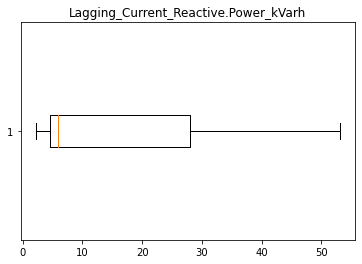

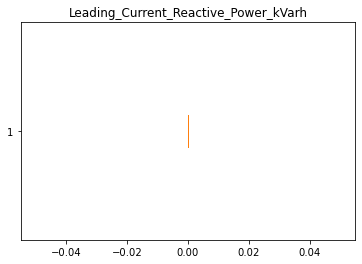

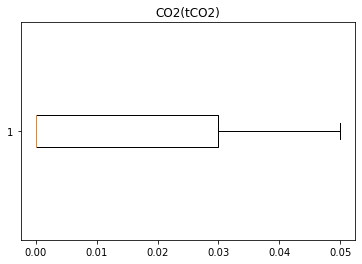

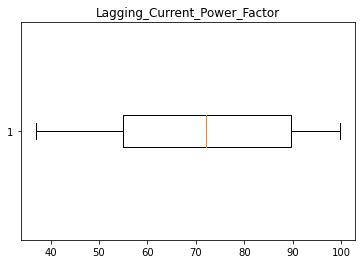

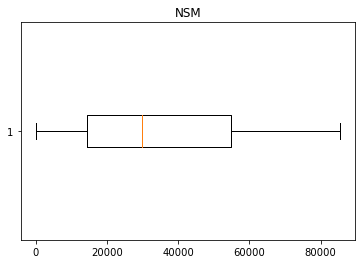

In [158]:
## again checking the boxplots:
plt.boxplot(x=new_df['Lagging_Current_Reactive.Power_kVarh'],vert=False)
plt.title('Lagging_Current_Reactive.Power_kVarh')
plt.show()

plt.boxplot(x=new_df['Leading_Current_Reactive_Power_kVarh'],vert=False)
plt.title('Leading_Current_Reactive_Power_kVarh')
plt.show()

plt.boxplot(x=new_df['CO2(tCO2)'],vert=False)
plt.title('CO2(tCO2)')
plt.show()

plt.boxplot(x=new_df['Lagging_Current_Power_Factor'],vert=False)
plt.title('Lagging_Current_Power_Factor')
plt.show()

plt.boxplot(x=new_df['NSM'],vert=False)
plt.title('NSM')
plt.show()

### Though there are still some outliers in 'Leading_Current_Reactive_Power_kVarh' we are not removing those as significant amount of data will be lost which is not desired for good model.

In [159]:
##number of rows after outlier removal
r2=len(new_df)
r2

22413

## Data loss because of outlier reduction

In [160]:
((r1-r2)/r1)*100 # we lost 27% data for outlier removal

12.092092877314089

In [161]:
df=new_df
df.shape

(22413, 13)

### Visualizing histogram for Categorical variables

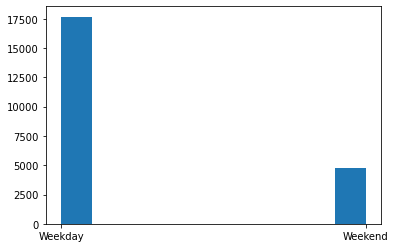

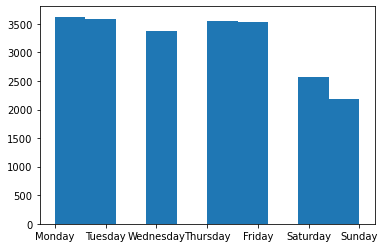

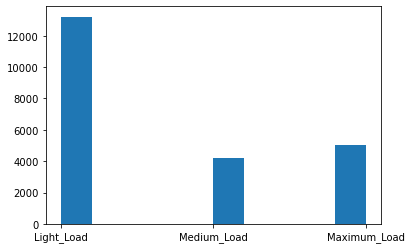

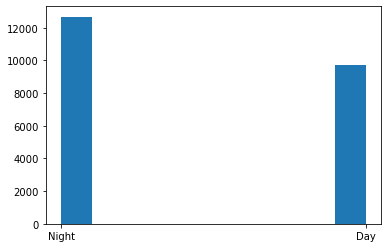

In [162]:
plt.hist(df['WeekStatus'])
plt.show()

plt.hist(df['Day_of_week'])
plt.show()

plt.hist(df['Load_Type'])
plt.show()

plt.hist(df['Shift'])
plt.show()

### Droping Date and Usage_kWh column 


In [163]:
target_var=df['Usage_kWh']

In [164]:

df.drop(['date','Usage_kWh','Usage_KWh_Bin'],axis=1,inplace=True)


### Converting Categorical variables to Dummy Variables

In [166]:
cat_variables=['WeekStatus', 'Day_of_week', 'Load_Type','Shift']

In [167]:
df = pd.get_dummies(df, columns=['WeekStatus', 'Day_of_week', 'Load_Type','Shift'],drop_first=True)
df.head()

Lagging_Current_Reactive.Power_kVarh  Leading_Current_Reactive_Power_kVarh  \
0                                  2.95                                   0.0   
1                                  4.46                                   0.0   
2                                  3.28                                   0.0   
3                                  3.56                                   0.0   
4                                  4.50                                   0.0   

   CO2(tCO2)  Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
0        0.0                         73.21                         100.0   
1        0.0                         66.77                         100.0   
2        0.0                         70.28                         100.0   
3        0.0                         68.09                         100.0   
4        0.0                         64.72                         100.0   

    NSM  WeekStatus_Weekend  Day_of_week_Monday  Day_of_week_Saturday  \
0   900                   0                   1                     0   
1  1800                   0                   1                     0   
2  2700                   0                   1                     0   
3  3600                   0                   1                     0   
4  4500                   0                   1                     0   

   Day_of_week_Sunday  Day_of_week_Thursday  Day_of_week_Tuesday  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Day_of_week_Wednesday  Load_Type_Maximum_Load  Load_Type_Medium_Load  \
0                      0                       0                      0   
1                      0                       0                      0   
2                      0                       0                      0   
3                      0                       0                      0   
4                      0                       0                      0   

   Shift_Night  
0            1  
1            1  
2            1  
3            1  
4            1

### Splitting the dataset into train set and test data set.


Training set is going to be the 70% of the original data.
Test set will be used for evaluating the model which is the 30% of the original data.

In [168]:
# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df, target_var, test_size = 0.30, random_state = 1006)

In [169]:
X_train.shape

(15689, 16)

### As the target variable 'Usage_Kwh' is continuous numerical variable so we are going to build a Linear Regression model for prediction.

In [170]:
# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [171]:
lin_reg.coef_[0]
lin_reg.intercept_

-3.870006580429095

In [172]:
# Intercept and co-efficients
pd.DataFrame({"Features": ["Intercept"] + X_train.columns.tolist(), 
              "Parameter Estimates": [lin_reg.intercept_.tolist()] + lin_reg.coef_.tolist()})

Features  Parameter Estimates
0                              Intercept        -3.870007e+00
1   Lagging_Current_Reactive.Power_kVarh         2.408334e-01
2   Leading_Current_Reactive_Power_kVarh        -1.647320e-07
3                              CO2(tCO2)         1.734809e+03
4           Lagging_Current_Power_Factor         9.814780e-02
5           Leading_Current_Power_Factor         4.519052e-12
6                                    NSM        -4.387906e-06
7                     WeekStatus_Weekend         6.303368e-02
8                     Day_of_week_Monday        -1.038636e-02
9                   Day_of_week_Saturday         6.133539e-03
10                    Day_of_week_Sunday         5.690014e-02
11                  Day_of_week_Thursday        -1.719954e-02
12                   Day_of_week_Tuesday         3.915388e-01
13                 Day_of_week_Wednesday        -3.630600e-02
14                Load_Type_Maximum_Load         1.239698e+00
15                 Load_Type_Medium_Load         1.991926e+00
16                           Shift_Night         1.960524e-01

The parameter estimations define the linear relation between the independent variables and Target variable Usage_kWh.

In [173]:
# R-squared - Percentage of variance in response explained by model
lin_reg.score(X_train, y_train)


0.9819154907153587

### The train model has got the  r-squared value 0.97  which is near 1.


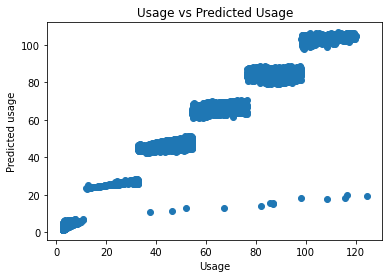

In [174]:
# Residuals or training error 
fitted_values = lin_reg.predict(X_train)

plt.scatter(y_train, fitted_values)
plt.xlabel("Usage")
plt.ylabel("Predicted usage")
plt.title("Usage vs Predicted Usage")
plt.show()

In [175]:
# Computing residuals
error_df = pd.DataFrame({"Observed_MEDV": y_train, "Predicted_MEDV": fitted_values})
error_df["Residuals"] = error_df.Observed_MEDV - error_df.Predicted_MEDV
error_df

Observed_MEDV  Predicted_MEDV  Residuals
5507           72.61       65.956714   6.653286
10287           3.35        4.094288  -0.744288
5777            3.92        4.158334  -0.238334
1380           89.53       87.390946   2.139054
887             4.54        4.324395   0.215605
...              ...             ...        ...
4950           66.20       65.959078   0.240922
9886            3.64        3.957167  -0.317167
23077          50.15       47.940067   2.209933
29621          68.87       68.634790   0.235210
9698            3.64        3.293494   0.346506

[15689 rows x 3 columns]

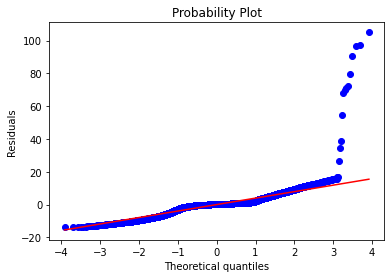

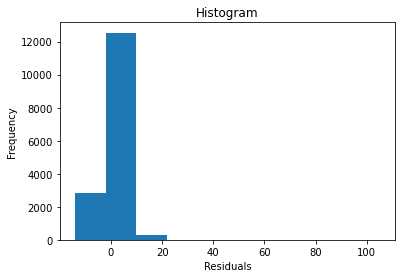

In [176]:
# Normality of residuals
residuals = y_train - fitted_values

# Probability plot for residuals -- The Red line on the plot represents the prediction of the residuals.
probplot(residuals, plot=plt)
plt.ylabel("Residuals")
plt.show()

# histogram for residuals- The histogram below shows that the residuals are somewhat Normally Distributed.
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [177]:
## Evaluation metrics
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 6.547e+04
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:16:18   Log-Likelihood:                -45822.
No. Observations:               15689   AIC:                         9.167e+04
Df Residuals:                   15675   BIC:                         9.178e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Adjusted R-squared value is 0.979 which indicates the model is good for prediction target variable. Durbin-Watson value is 2.026 ( value around 2 indicates there is no autocorrelation in the residuals).

## Evaluating the Model on Test Data set

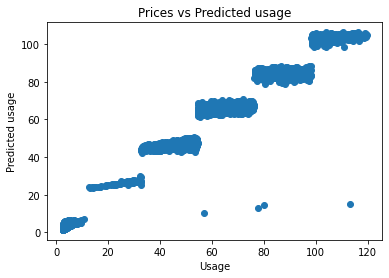

In [178]:
# Evaluating the model
y_pred = lin_reg.predict(X_test) # prediction errors

plt.scatter(y_test, y_pred) 
plt.xlabel("Usage")
plt.ylabel("Predicted usage")
plt.title("Prices vs Predicted usage")
plt.show()

In [179]:
# Intercept and co-efficients
pd.DataFrame({"Features": ["Intercept"] + X_train.columns.tolist(), 
              "Parameter Estimates": [lin_reg.intercept_.tolist()] + lin_reg.coef_.tolist()})

Features  Parameter Estimates
0                              Intercept        -3.870007e+00
1   Lagging_Current_Reactive.Power_kVarh         2.408334e-01
2   Leading_Current_Reactive_Power_kVarh        -1.647320e-07
3                              CO2(tCO2)         1.734809e+03
4           Lagging_Current_Power_Factor         9.814780e-02
5           Leading_Current_Power_Factor         4.519052e-12
6                                    NSM        -4.387906e-06
7                     WeekStatus_Weekend         6.303368e-02
8                     Day_of_week_Monday        -1.038636e-02
9                   Day_of_week_Saturday         6.133539e-03
10                    Day_of_week_Sunday         5.690014e-02
11                  Day_of_week_Thursday        -1.719954e-02
12                   Day_of_week_Tuesday         3.915388e-01
13                 Day_of_week_Wednesday        -3.630600e-02
14                Load_Type_Maximum_Load         1.239698e+00
15                 Load_Type_Medium_Load         1.991926e+00
16                           Shift_Night         1.960524e-01

In [180]:
# Computing prediction errors on test data
error_df = pd.DataFrame({"Observed_MEDV": y_test, "Predicted_MEDV": y_pred})
error_df["Prediction_errors"] = error_df.Observed_MEDV - error_df.Predicted_MEDV
error_df

Observed_MEDV  Predicted_MEDV  Prediction_errors
27332          57.78       67.014090          -9.234090
787             4.64        5.080179          -0.440179
21138           2.81        2.047949           0.762051
27703          63.50       69.292008          -5.792008
17130          68.47       64.683634           3.786366
...              ...             ...                ...
28318           3.60        2.211372           1.388628
24898          45.76       47.803549          -2.043549
10433          74.45       69.786155           4.663845
12859           3.56        5.340553          -1.780553
21440           2.59        1.961900           0.628100

[6724 rows x 3 columns]

In [181]:
# Evaluation metrics - MSE (Mean squared errors)- on test data

mse = mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
print('Mean squared error on test data is ',mse)
print('Root mean squared error on test data is ',rmse)

Mean squared error on test data is  18.47107015066601
Root mean squared error on test data is  4.297798291063229


18.471070150666023

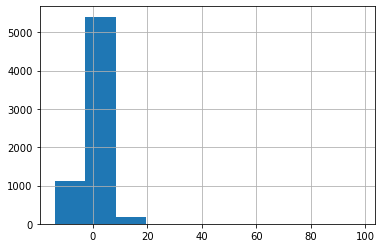

In [182]:
# Computing MSE manually
error_df.Prediction_errors.hist() # histogram for the prediction errors
error_df["Squared_Error"] = error_df.Prediction_errors ** 2
error_df.Squared_Error.mean()  # The histogram shows that the residuals are somewhat Normally Distributed.

In [183]:
predictions = lin_reg.predict(X_test)
predictions

array([67.01408973,  5.08017945,  2.04794923, ..., 69.78615461,
        5.34055349,  1.96190014])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Usage_kWh'>

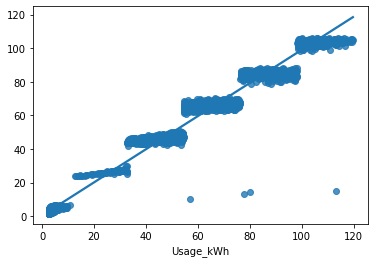

In [184]:
sns.regplot(y_test,predictions) ## This graph implies that the model has a good prediction


In [185]:
# Evaluation metrices on Test data

import statsmodels.api as sm
X_test_Sm= sm.add_constant(X_test)
X_test_Sm= sm.add_constant(X_test)
ls=sm.OLS(y_test,X_test_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 3.044e+04
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:16:59   Log-Likelihood:                -19331.
No. Observations:                6724   AIC:                         3.869e+04
Df Residuals:                    6710   BIC:                         3.879e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


 Adjusted R-squared value in test data set is 0.981 which near 1. So this means the model is not overfitted.Also the Durbin - Watson value is 2.005 which indicates that there is no first order auto correlation in the residuals. Therefore we can say that this is a good Predictive Model.

### Observation: The sign of the parameter estimates indicate that Lagging_Current_Reactive.Power_kVarh ,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor, Leading_Current_Power_Factor is positively correlated with Usage_KWh, whereas NSM is negatively correlated to Usage_KWh. The value of the parameter estimates define the relations.


# Classification: Decision Tree

## Loading the libraries

In [2]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix

### As Exploratory data analysis , Outlier removal is done already in the previous model. So the process is going to be repeated.

### Importing data to environment: As we are going to build Classification model we are taking 'Load_Type' as Target Variable.

In [187]:
df=pd.read_csv("Steel_industry_data.csv")
df = pd.DataFrame(data=df)

In [43]:
df.head() ## Checking the data structure by looking at first 5 records

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [44]:
df.shape # There are 11 columns and 35040 rows in the given dataset

(35040, 11)

In [45]:
df.describe() ## This displays the summary statistics of the data.

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.090000      0.020000   
max                               27.760000      0.070000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  35040.000000                  35040.000000   
mean                      80.578056                     84.367870   
std                       18.921322                     30.456535   
min                        0.000000                      0.000000   
25%                       63.320000                     99.700000   
50%                       87.960000                    100.000000   
75%                       99.022500                    100.000000   
max                      100.000000                    100.000000   

                NSM  
count  35040.000000  
mean   42750.000000  
std    24940.534317  
min        0.000000  
25%    21375.000000  
50%    42750.000000  
75%    64125.000000  
max    85500.000000

In [46]:
df.info() # There is no missing value.
          # Data type of date,WeekStatus,Day_of_week,Load_type is String, 
          # NSM is integer type and rest columns are Numerical Variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [47]:
df.duplicated().sum()    ## There is no duplicate data

0

### We can not use Datetime data directly in Regression model, so we are creating Column 'Shift' to label the data for Day and Night time## Creating a col Shift from date col

In [49]:
df["Shift"]=df['date'].apply(lambda x : "Day" if pd.to_datetime(str(x)).time().hour >=7 and pd.to_datetime(str(x)).time().hour < 19 else "Night" )
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  Shift  
0    Weekday      Monday  Light_Load  Night  
1    Weekday      Monday  Light_Load  Night  
2    Weekday      Monday  Light_Load  Night  
3    Weekday      Monday  Light_Load  Night  
4    Weekday      Monday  Light_Load  Night

### Checking if there is any outlier: If there is any outlier we need to remove them as presence of outliers in model affects the prediction accuracy.

In [50]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Shift'],
      dtype='object')

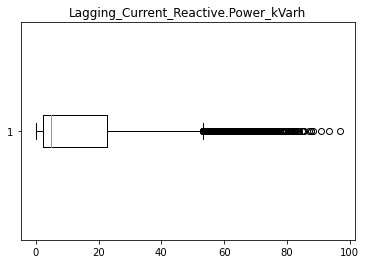

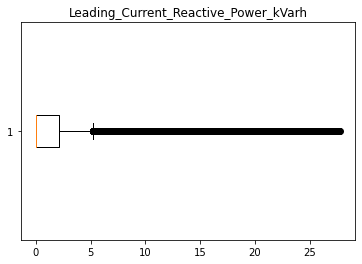

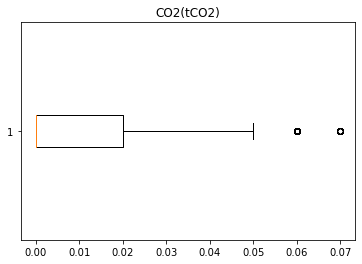

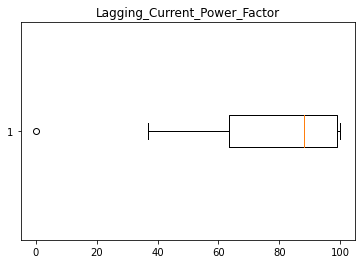

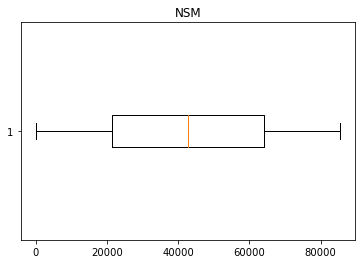

In [51]:
## Checking outlier by looking at BoxPlot of Numerical Variables


plt.boxplot(x=df['Lagging_Current_Reactive.Power_kVarh'],vert=False)
plt.title('Lagging_Current_Reactive.Power_kVarh')
plt.show()

plt.boxplot(x=df['Leading_Current_Reactive_Power_kVarh'],vert=False)
plt.title('Leading_Current_Reactive_Power_kVarh')
plt.show()

plt.boxplot(x=df['CO2(tCO2)'],vert=False)
plt.title('CO2(tCO2)')
plt.show()

plt.boxplot(x=df['Lagging_Current_Power_Factor'],vert=False)
plt.title('Lagging_Current_Power_Factor')
plt.show()

plt.boxplot(x=df['NSM'],vert=False)
plt.title('NSM')
plt.show()

The boxplots of 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh','CO2(tCO2)', 'Lagging_Current_Power_Factor' show that there are outlier present in the data.

In [53]:
## Number of rows before outlier removal
r1=len(df)
r1

35040

## Removing Outliers

In [55]:
## Defining function to get outliers
def outliers(data,feature):

   Q1=df[feature].quantile(0.25)

   Q3=df[feature].quantile(0.75)

   IQR=Q3-Q1

   Lower_boundary=Q1-1.5*IQR
    
   Upper_boundary=Q3+1.5*IQR

   outliers_list = df.index[(df[feature]<(Q1-1.5*IQR)) | (df[feature]>(Q3+1.5*IQR))]

   return outliers_list

In [56]:
# Create an empty list to store the output indices  from mulitple cols
index_list=[]
for feature in ['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']:
    index_list.extend(outliers(df,feature))

In [57]:
index_list

[140,
 141,
 142,
 143,
 152,
 153,
 155,
 157,
 159,
 160,
 162,
 226,
 321,
 322,
 323,
 324,
 326,
 332,
 333,
 334,
 335,
 352,
 417,
 418,
 419,
 428,
 429,
 430,
 442,
 445,
 447,
 449,
 452,
 705,
 706,
 712,
 714,
 716,
 717,
 718,
 719,
 726,
 727,
 734,
 738,
 745,
 746,
 749,
 751,
 800,
 801,
 802,
 804,
 812,
 813,
 814,
 841,
 896,
 897,
 898,
 908,
 910,
 911,
 917,
 934,
 993,
 994,
 1018,
 1019,
 1021,
 1027,
 1033,
 1038,
 1041,
 1089,
 1090,
 1093,
 1100,
 1102,
 1103,
 1112,
 1113,
 1116,
 1117,
 1125,
 1129,
 1130,
 1134,
 1185,
 1186,
 1377,
 1378,
 1383,
 1385,
 1388,
 1389,
 1390,
 1391,
 1397,
 1398,
 1399,
 1474,
 1485,
 1487,
 1513,
 1520,
 1569,
 1590,
 1666,
 1672,
 1673,
 1674,
 1675,
 1676,
 1677,
 1678,
 1679,
 1685,
 1695,
 1697,
 1701,
 1705,
 1706,
 1707,
 1709,
 1710,
 1772,
 1773,
 1774,
 1775,
 1796,
 1801,
 1806,
 2049,
 2050,
 2062,
 2063,
 2173,
 2185,
 2241,
 2242,
 2254,
 2337,
 2338,
 2433,
 2434,
 2445,
 2447,
 2474,
 2732,
 2734,
 2735,
 27

In [58]:
# Defining a function to remove outliers
def remove_outliers(data,ls):
    ls=sorted(set(ls))
    data=data.drop(ls)
    return data
    

In [59]:
#Applying the function on the dataset
new_df=remove_outliers(df,index_list)
new_df.shape

(25496, 12)

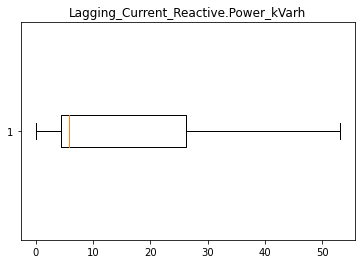

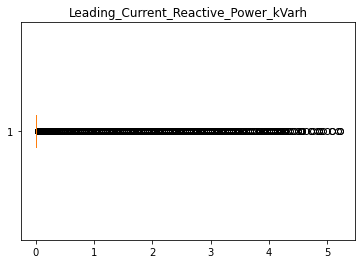

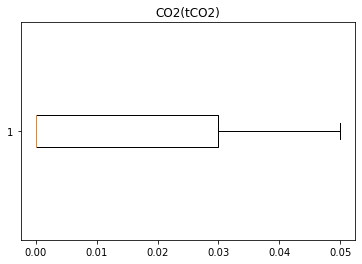

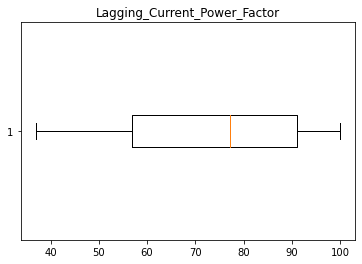

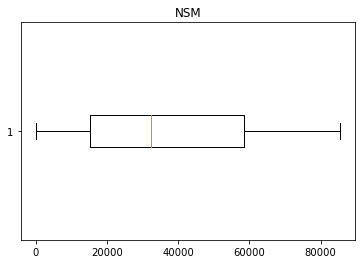

In [60]:
## again checking the boxplots:
plt.boxplot(x=new_df['Lagging_Current_Reactive.Power_kVarh'],vert=False)
plt.title('Lagging_Current_Reactive.Power_kVarh')
plt.show()

plt.boxplot(x=new_df['Leading_Current_Reactive_Power_kVarh'],vert=False)
plt.title('Leading_Current_Reactive_Power_kVarh')
plt.show()

plt.boxplot(x=new_df['CO2(tCO2)'],vert=False)
plt.title('CO2(tCO2)')
plt.show()

plt.boxplot(x=new_df['Lagging_Current_Power_Factor'],vert=False)
plt.title('Lagging_Current_Power_Factor')
plt.show()

plt.boxplot(x=new_df['NSM'],vert=False)
plt.title('NSM')
plt.show()

Though there are still some outliers in 'Leading_Current_Reactive_Power_kVarh' we are not removing those as significant amount of data will be lost which is not desired for good model.

In [61]:
##number of rows after outlier removal
r2=len(new_df)
r2

25496

### Data loss because of outlier reduction

In [63]:
((r1-r2)/r1)*100 # we lost 27% data for outlier removal

27.237442922374427

In [64]:
df=new_df
df.shape

(25496, 12)

### Feature Selection for Classification: As this is Classifcation problem the Target variable is taken 'Load_Type'. There are 3 categories of Load_type- Light_Load, Medium_Load, Maximum_Load. The model is expected to classify the records by the Load_type.

In [66]:
df.Load_Type.unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

### Creating Dummy variables for categorical variables

In [68]:
cat_variables=['WeekStatus', 'Day_of_week','Shift']

In [69]:
df = pd.get_dummies(df, columns=['WeekStatus', 'Day_of_week', 'Shift'],drop_first=True)
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

    Load_Type  WeekStatus_Weekend  Day_of_week_Monday  Day_of_week_Saturday  \
0  Light_Load                   0                   1                     0   
1  Light_Load                   0                   1                     0   
2  Light_Load                   0                   1                     0   
3  Light_Load                   0                   1                     0   
4  Light_Load                   0                   1                     0   

   Day_of_week_Sunday  Day_of_week_Thursday  Day_of_week_Tuesday  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Day_of_week_Wednesday  Shift_Night  
0                      0            1  
1                      0            1  
2                      0            1  
3                      0            1  
4                      0            1

### Feature Selection

In [71]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Load_Type', 'WeekStatus_Weekend', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Shift_Night'],
      dtype='object')

In [72]:
#split dataset in features and target variable
feature_cols = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
        'WeekStatus_Weekend', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Shift_Night']
X = df[feature_cols] # Features
y = df.Load_Type # Target variable

In [111]:
df.Load_Type.value_counts() 
# There is class imbalance in the data set. Light_Load has much higher frequency than two other classes.

Light_Load      14113
Maximum_Load     5970
Medium_Load      5413
Name: Load_Type, dtype: int64

## Splitting the data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Building decision tree model: Here the decision tree classification is built on the criteria 'Gini' (this is default criterion also). Max_depth is none, so the nodes are expanded till all leaves are pure or all leaves contain less than min_samples_split samples.

In [74]:
# Creating Decision Tree classifer object- Gini by default
clf_gini = DecisionTreeClassifier(criterion="gini")

# Train Decision Tree Classifer
clf_gini = clf_gini.fit(X_train,y_train)



In [76]:
  #Predicting the response for tarin dataset
y_pred_gini_train = clf_gini.predict(X_train)

### Model Evaluation(on Train data): The below accuracy score shows that the model is 99% accurate.

In [77]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_gini_train))

Accuracy: 0.9998879363478456


In [82]:
print(classification_report(y_train,y_pred_gini_train))

              precision    recall  f1-score   support

  Light_Load       1.00      1.00      1.00      9831
Maximum_Load       1.00      1.00      1.00      4222
 Medium_Load       1.00      1.00      1.00      3794

    accuracy                           1.00     17847
   macro avg       1.00      1.00      1.00     17847
weighted avg       1.00      1.00      1.00     17847



### Evaluating Model on Test dataset:


In [78]:
#Predicting the response for test dataset
y_pred_gini = clf_gini.predict(X_test)

### Model Evaluation(on Test data)

In [80]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

Accuracy: 0.9006406066152438


The accuracy score implies that the model is 90% accurate on the test data set.

In [97]:
print('The confusion matrix is \n',confusion_matrix(y_test,y_pred_gini))

print('Classification score:\n ',classification_report(y_test,y_pred_gini))

The confusion matrix is 
 [[4257    4   21]
 [   4 1379  365]
 [  16  350 1253]]
Classification score:
                precision    recall  f1-score   support

  Light_Load       1.00      0.99      0.99      4282
Maximum_Load       0.80      0.79      0.79      1748
 Medium_Load       0.76      0.77      0.77      1619

    accuracy                           0.90      7649
   macro avg       0.85      0.85      0.85      7649
weighted avg       0.90      0.90      0.90      7649



### Evaluation metric: :As there is class imbalance in the given dataset, so we should consider F1 score as evaluation metric. Here the f1 score for Light_Load is 99%, for Maximum_Load it is 79% and for Medium_Load it is 77%. Also the overall accuracy is 90% .

### Visualizing the Decision Tree

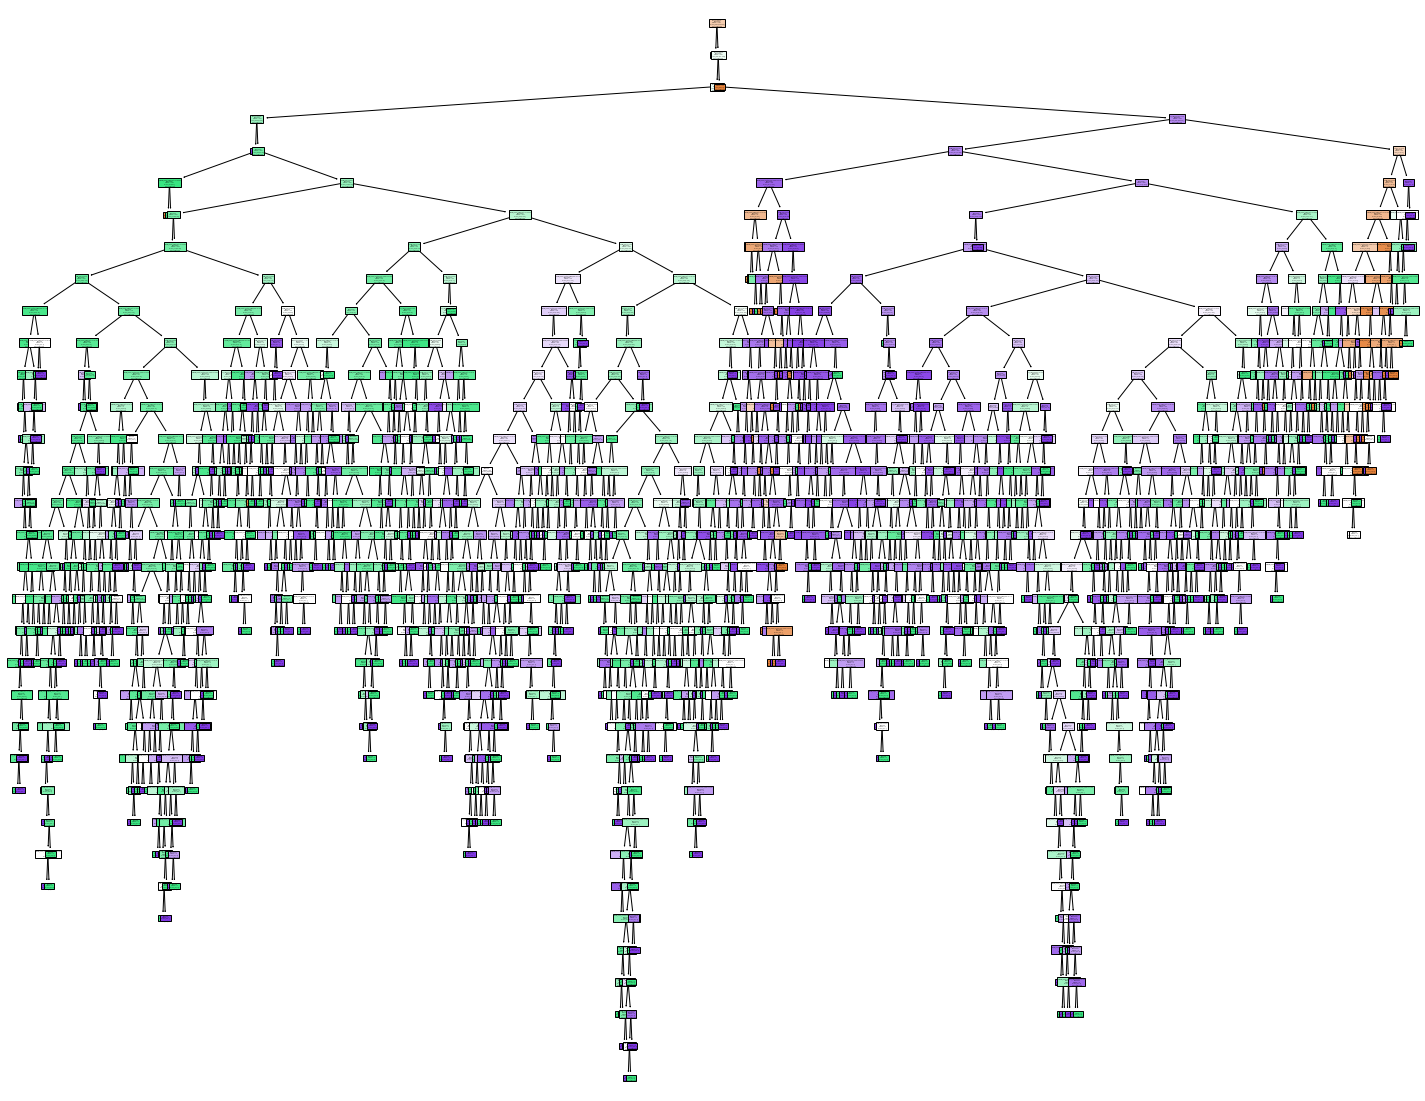

In [83]:
fig = plt.figure(figsize=(25,20))
_ =tree.plot_tree(clf_gini, 
                   feature_names=feature_cols,  
                   class_names=df.Load_Type,
                   filled=True)

In [85]:
fig.savefig("decision_tree_gini.png") #Saving the visual

### Optimizing Decision tree performance

In [100]:
# Create Decision Tree classifer object
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf_entropy = clf_entropy.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_entropy = clf_entropy.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

Accuracy: 0.9007713426591711


In [102]:
print('The confusion matrix is \n',confusion_matrix(y_test,y_pred_entropy))

print('Classification score:\n ',classification_report(y_test,y_pred_entropy))

The confusion matrix is 
 [[4242    1   39]
 [   2 1414  332]
 [   4  381 1234]]
Classification score:
                precision    recall  f1-score   support

  Light_Load       1.00      0.99      0.99      4282
Maximum_Load       0.79      0.81      0.80      1748
 Medium_Load       0.77      0.76      0.77      1619

    accuracy                           0.90      7649
   macro avg       0.85      0.85      0.85      7649
weighted avg       0.90      0.90      0.90      7649



### Evaluation metrics: Now the f1 score for Light_Load is 99%, for Maximum_Load it is 80% and for Medium_Load it is 77%. The overall accuracy is 90% .

### Visualizing the Decision Tree

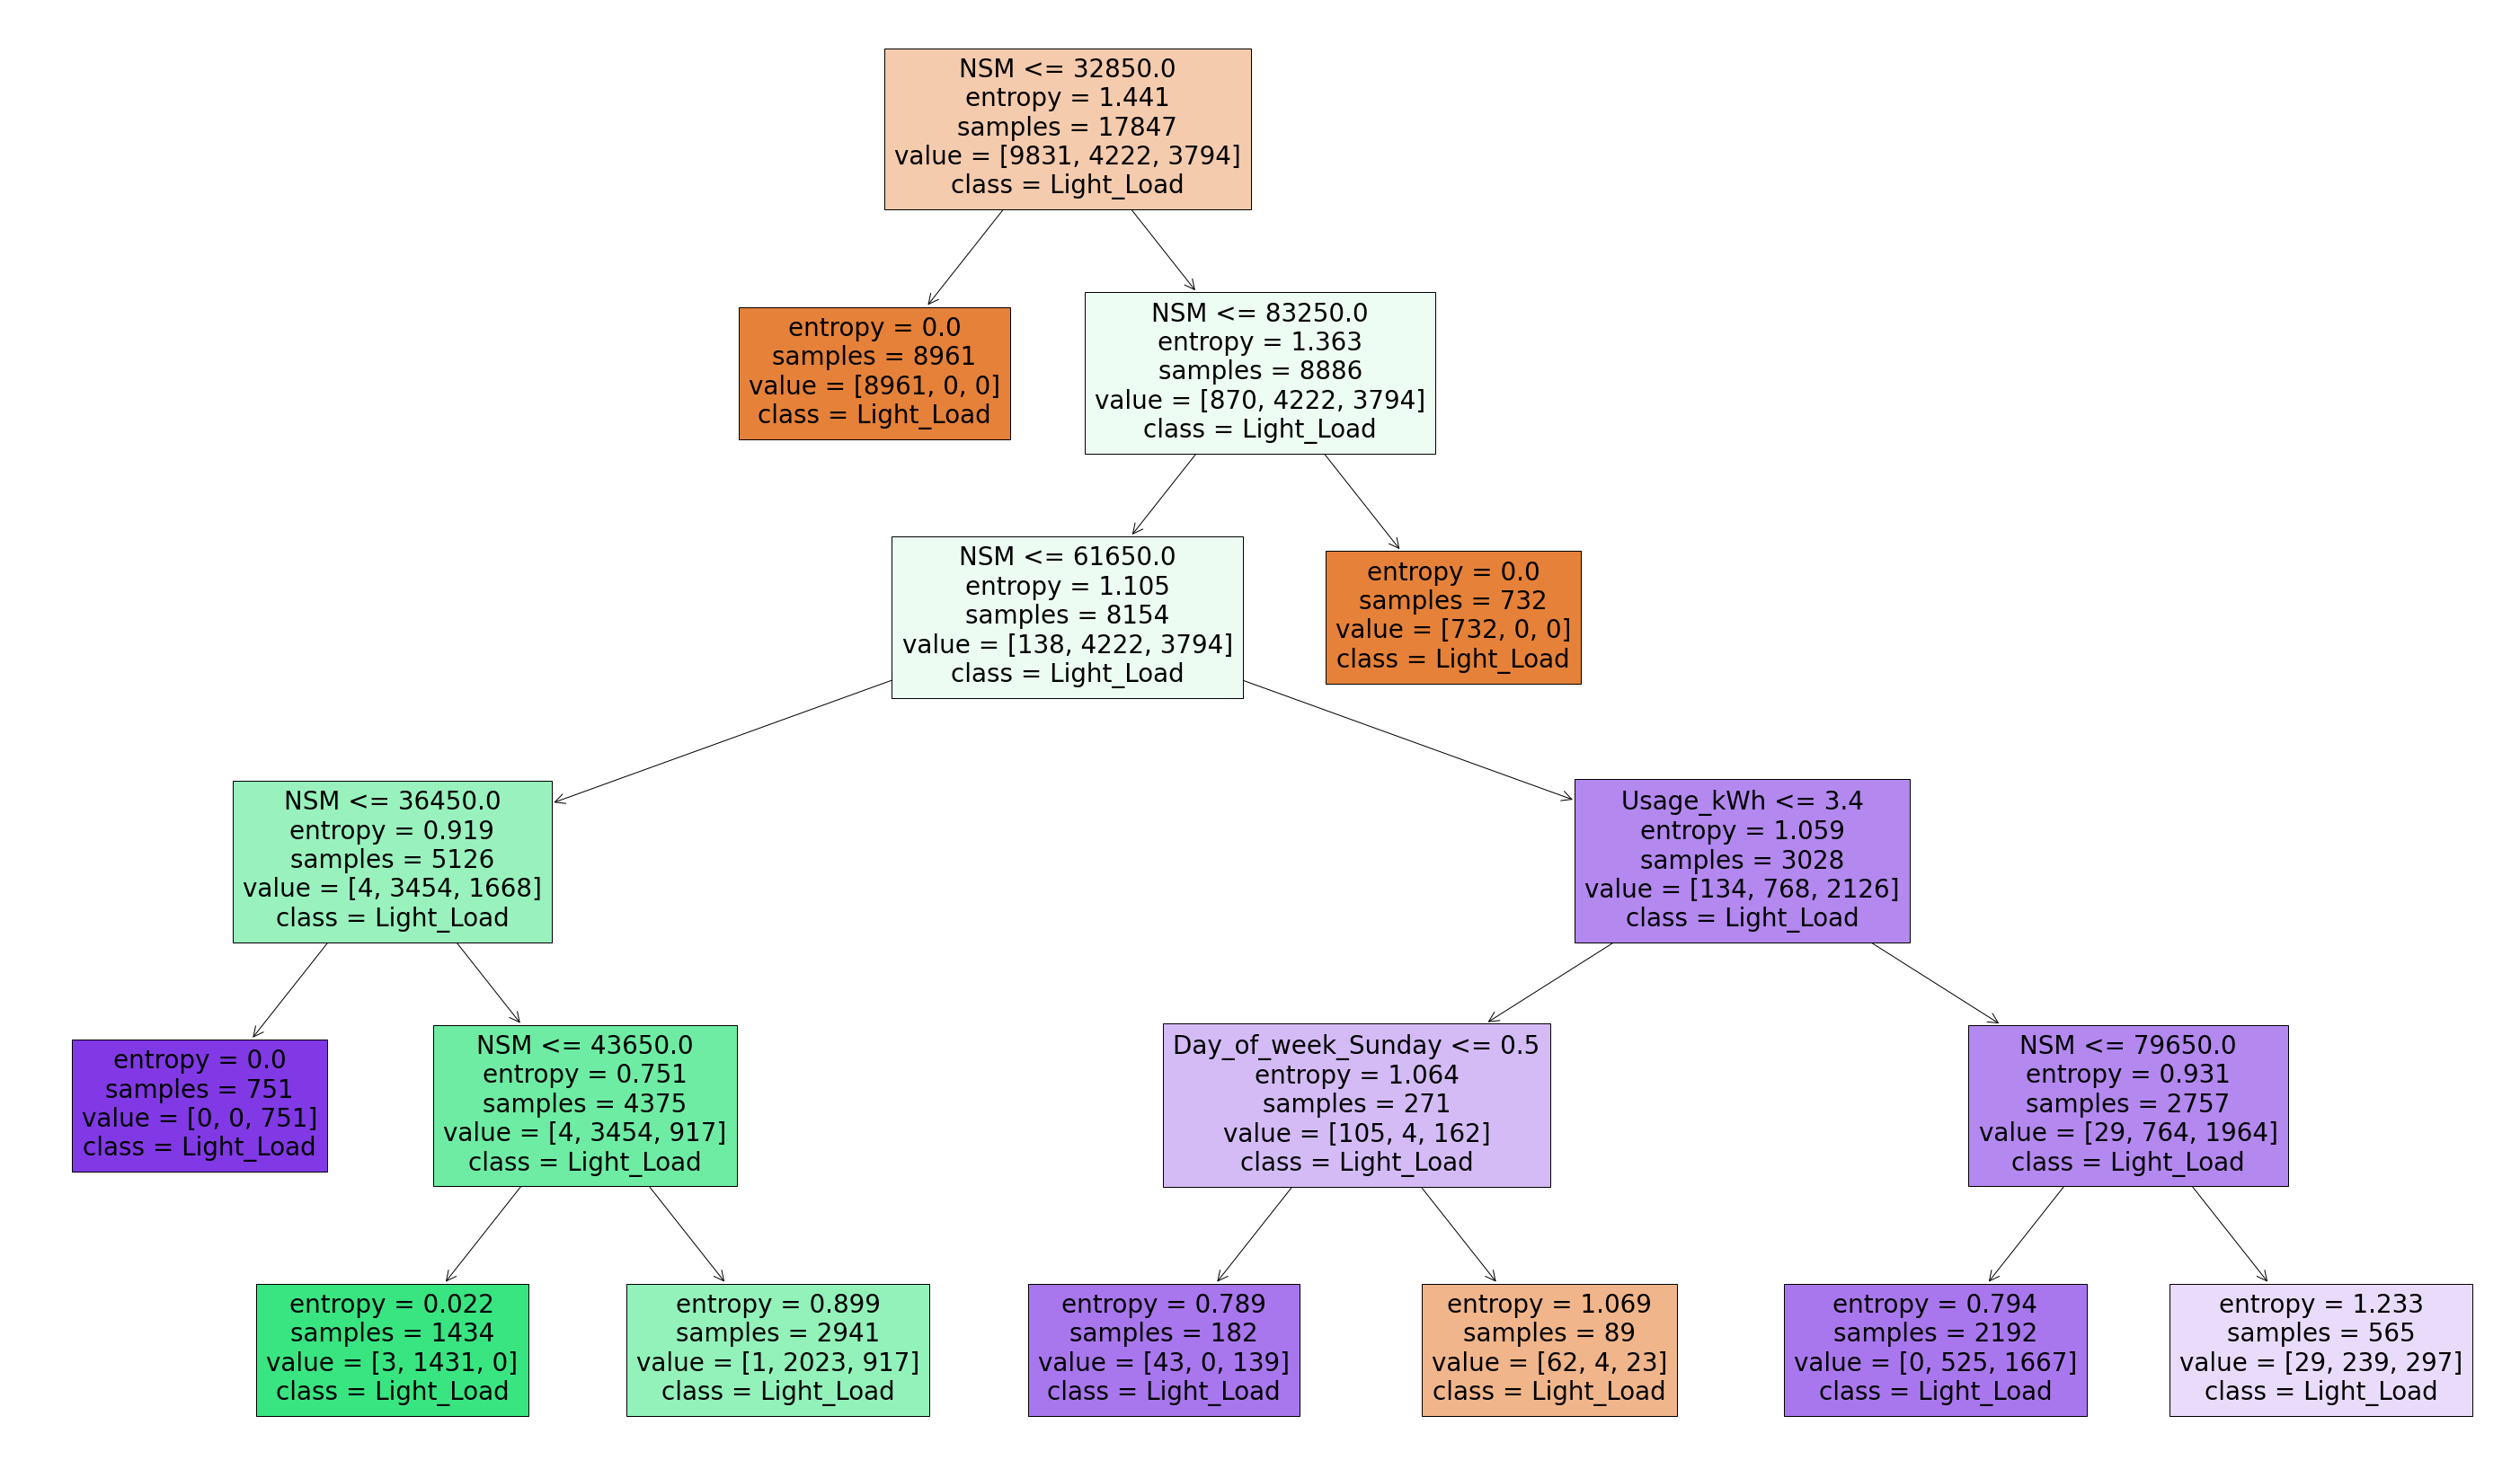

In [103]:
fig = plt.figure(figsize=(50,30))
_ =tree.plot_tree(clf_entropy, 
                   feature_names=feature_cols,  
                   class_names=df.Load_Type,
                   filled=True)

In [104]:
fig.savefig("decision_tree_entropy.png") #saving the visual

### Observation: This decision tree classification model has the accuracy rate 90% which can be accepted as good model. The max_depth can be changed based on the business requirement to get the full picture of the decision tree.

## Ensemble Model: Random Forest Classification

### In this model we are taking 'Load_Type' as Target variable and going to build Random Forest classification model.

### We are repeating the Data import, EDA, Outlier removal the same way in the previous models.

In [188]:
df=pd.read_csv("Steel_industry_data.csv")
df = pd.DataFrame(data=df)

In [189]:
df["Shift"]=df['date'].apply(lambda x : "Day" if pd.to_datetime(str(x)).time().hour >=7 and pd.to_datetime(str(x)).time().hour < 19 else "Night" )
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  Shift  
0    Weekday      Monday  Light_Load  Night  
1    Weekday      Monday  Light_Load  Night  
2    Weekday      Monday  Light_Load  Night  
3    Weekday      Monday  Light_Load  Night  
4    Weekday      Monday  Light_Load  Night

In [178]:
df.Load_Type.unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [179]:
cat_variables=['WeekStatus', 'Day_of_week','Shift']

In [180]:
## Removing Outliers:
## Defining function to get outliers
def outliers(data,feature):

   Q1=df[feature].quantile(0.25)

   Q3=df[feature].quantile(0.75)

   IQR=Q3-Q1

   Lower_boundary=Q1-1.5*IQR
    
   Upper_boundary=Q3+1.5*IQR

   outliers_list = df.index[(df[feature]<(Q1-1.5*IQR)) | (df[feature]>(Q3+1.5*IQR))]

   return outliers_list

In [181]:
# Create an empty list to store the output indices  from mulitple cols
index_list=[]
for feature in ['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']:
    index_list.extend(outliers(df,feature))

In [124]:
index_list

[140,
 141,
 142,
 143,
 152,
 153,
 155,
 157,
 159,
 160,
 162,
 226,
 321,
 322,
 323,
 324,
 326,
 332,
 333,
 334,
 335,
 352,
 417,
 418,
 419,
 428,
 429,
 430,
 442,
 445,
 447,
 449,
 452,
 705,
 706,
 712,
 714,
 716,
 717,
 718,
 719,
 726,
 727,
 734,
 738,
 745,
 746,
 749,
 751,
 800,
 801,
 802,
 804,
 812,
 813,
 814,
 841,
 896,
 897,
 898,
 908,
 910,
 911,
 917,
 934,
 993,
 994,
 1018,
 1019,
 1021,
 1027,
 1033,
 1038,
 1041,
 1089,
 1090,
 1093,
 1100,
 1102,
 1103,
 1112,
 1113,
 1116,
 1117,
 1125,
 1129,
 1130,
 1134,
 1185,
 1186,
 1377,
 1378,
 1383,
 1385,
 1388,
 1389,
 1390,
 1391,
 1397,
 1398,
 1399,
 1474,
 1485,
 1487,
 1513,
 1520,
 1569,
 1590,
 1666,
 1672,
 1673,
 1674,
 1675,
 1676,
 1677,
 1678,
 1679,
 1685,
 1695,
 1697,
 1701,
 1705,
 1706,
 1707,
 1709,
 1710,
 1772,
 1773,
 1774,
 1775,
 1796,
 1801,
 1806,
 2049,
 2050,
 2062,
 2063,
 2173,
 2185,
 2241,
 2242,
 2254,
 2337,
 2338,
 2433,
 2434,
 2445,
 2447,
 2474,
 2732,
 2734,
 2735,
 27

In [182]:
# Defining a function to remove outliers
def remove_outliers(data,ls):
    ls=sorted(set(ls))
    data=data.drop(ls)
    return data

In [183]:
#Applying the function on the dataset
new_df=remove_outliers(df,index_list)
new_df.shape

(25496, 12)

### Feature Selection for Classification: As this is Classifcation problem the Target variable is taken 'Load_Type'. There are 3 categories of Load_type- Light_Load, Medium_Load, Maximum_Load. The model is expected to classify the records by the Load_type.

In [184]:
### Creating Dummy variables for categorical variables
cat_variables=['WeekStatus', 'Day_of_week','Shift']
df = pd.get_dummies(df, columns=['WeekStatus', 'Day_of_week', 'Shift'],drop_first=True)
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

    Load_Type  WeekStatus_Weekend  Day_of_week_Monday  Day_of_week_Saturday  \
0  Light_Load                   0                   1                     0   
1  Light_Load                   0                   1                     0   
2  Light_Load                   0                   1                     0   
3  Light_Load                   0                   1                     0   
4  Light_Load                   0                   1                     0   

   Day_of_week_Sunday  Day_of_week_Thursday  Day_of_week_Tuesday  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Day_of_week_Wednesday  Shift_Night  
0                      0            1  
1                      0            1  
2                      0            1  
3                      0            1  
4                      0            1

In [128]:
## Feature Selection
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Load_Type', 'WeekStatus_Weekend', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Shift_Night'],
      dtype='object')

In [185]:
#split dataset in features and target variable
feature_cols = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
        'WeekStatus_Weekend', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Shift_Night']
X = df[feature_cols] # Features
y = df.Load_Type # Target variable

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [187]:
X_train.shape, X_test.shape

((24528, 15), (10512, 15))

In [134]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

### Evaluation of the model

In [135]:
# checking the oob score
classifier_rf.oob_score_

0.8412834311806915

The model is 84% accurate on train dataset.

In [188]:
# Evaluating model on Test data set:
classifier_rf.fit(X_test, y_test)
classifier_rf.oob_score_

0.8305745814307458

The model is 83% accurate on test dataset.

 ## Hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [137]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [138]:
from sklearn.model_selection import GridSearchCV

In [154]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [152]:
# Evaluation metric
print("Score",grid_search.best_score_)
print("Best Parameters:",grid_search.best_params_) # This gives best combinations of hyperparameters

Score 0.9004810828440964
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}


The model has 90% accuracy.

In [189]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

## Visualization 


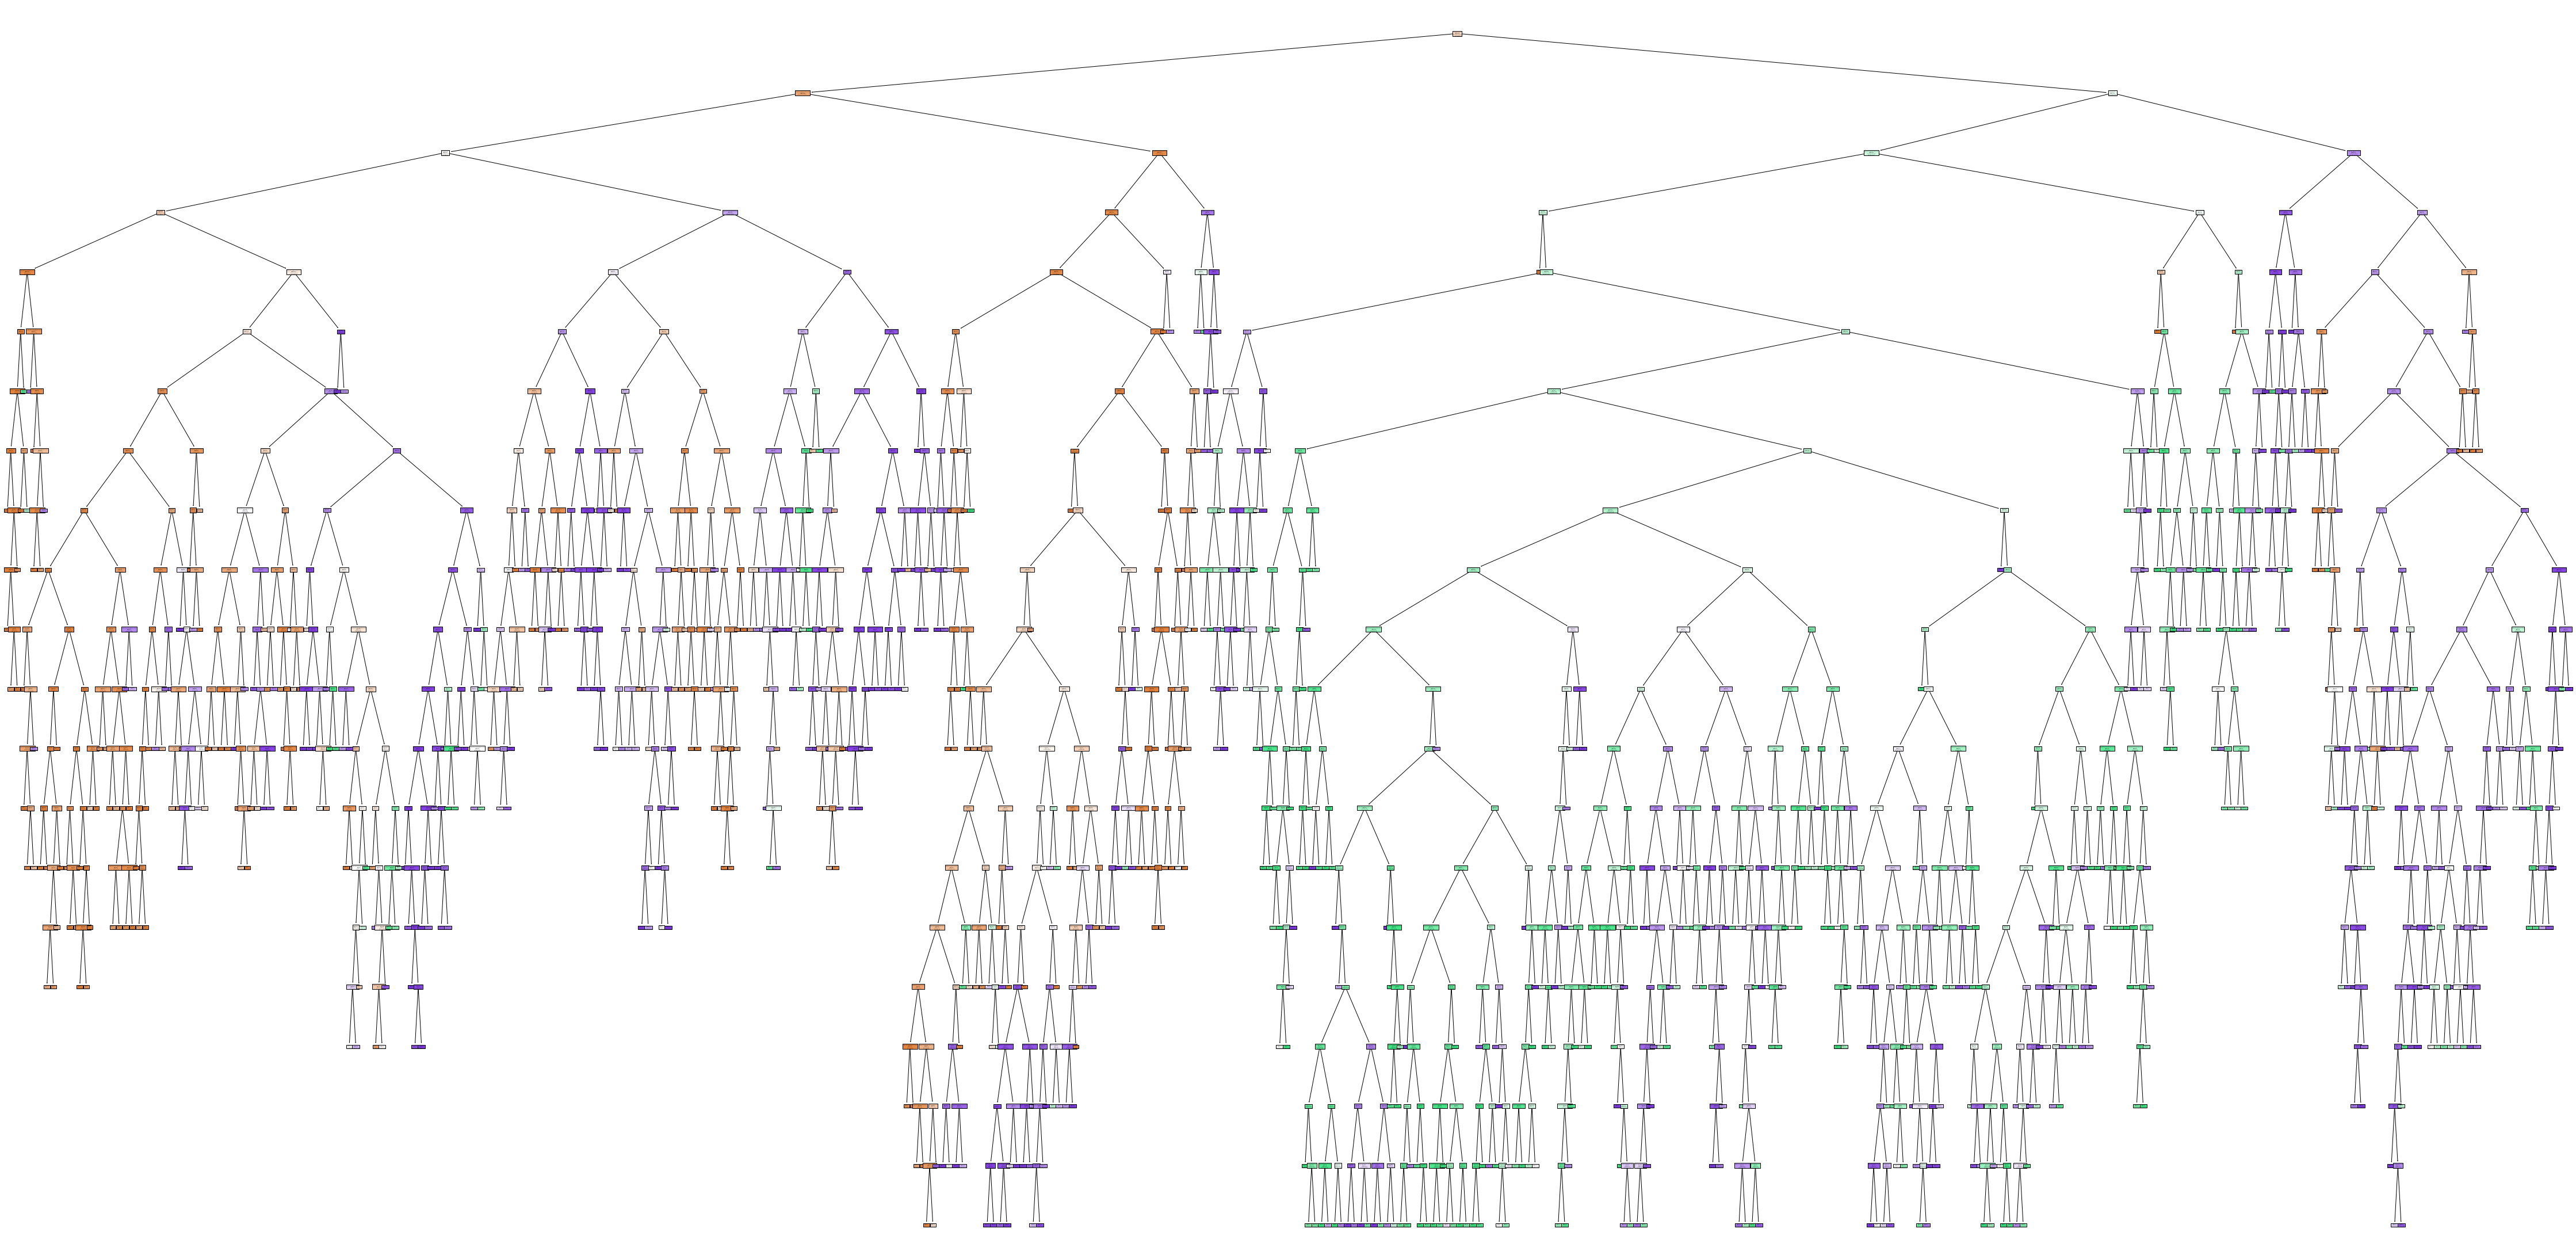

In [143]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=["Light_Load", "Medium_Load","Maximum_Load"],filled=True);



In [144]:
fig.savefig("Random_forest_5.png") #Saving the visual

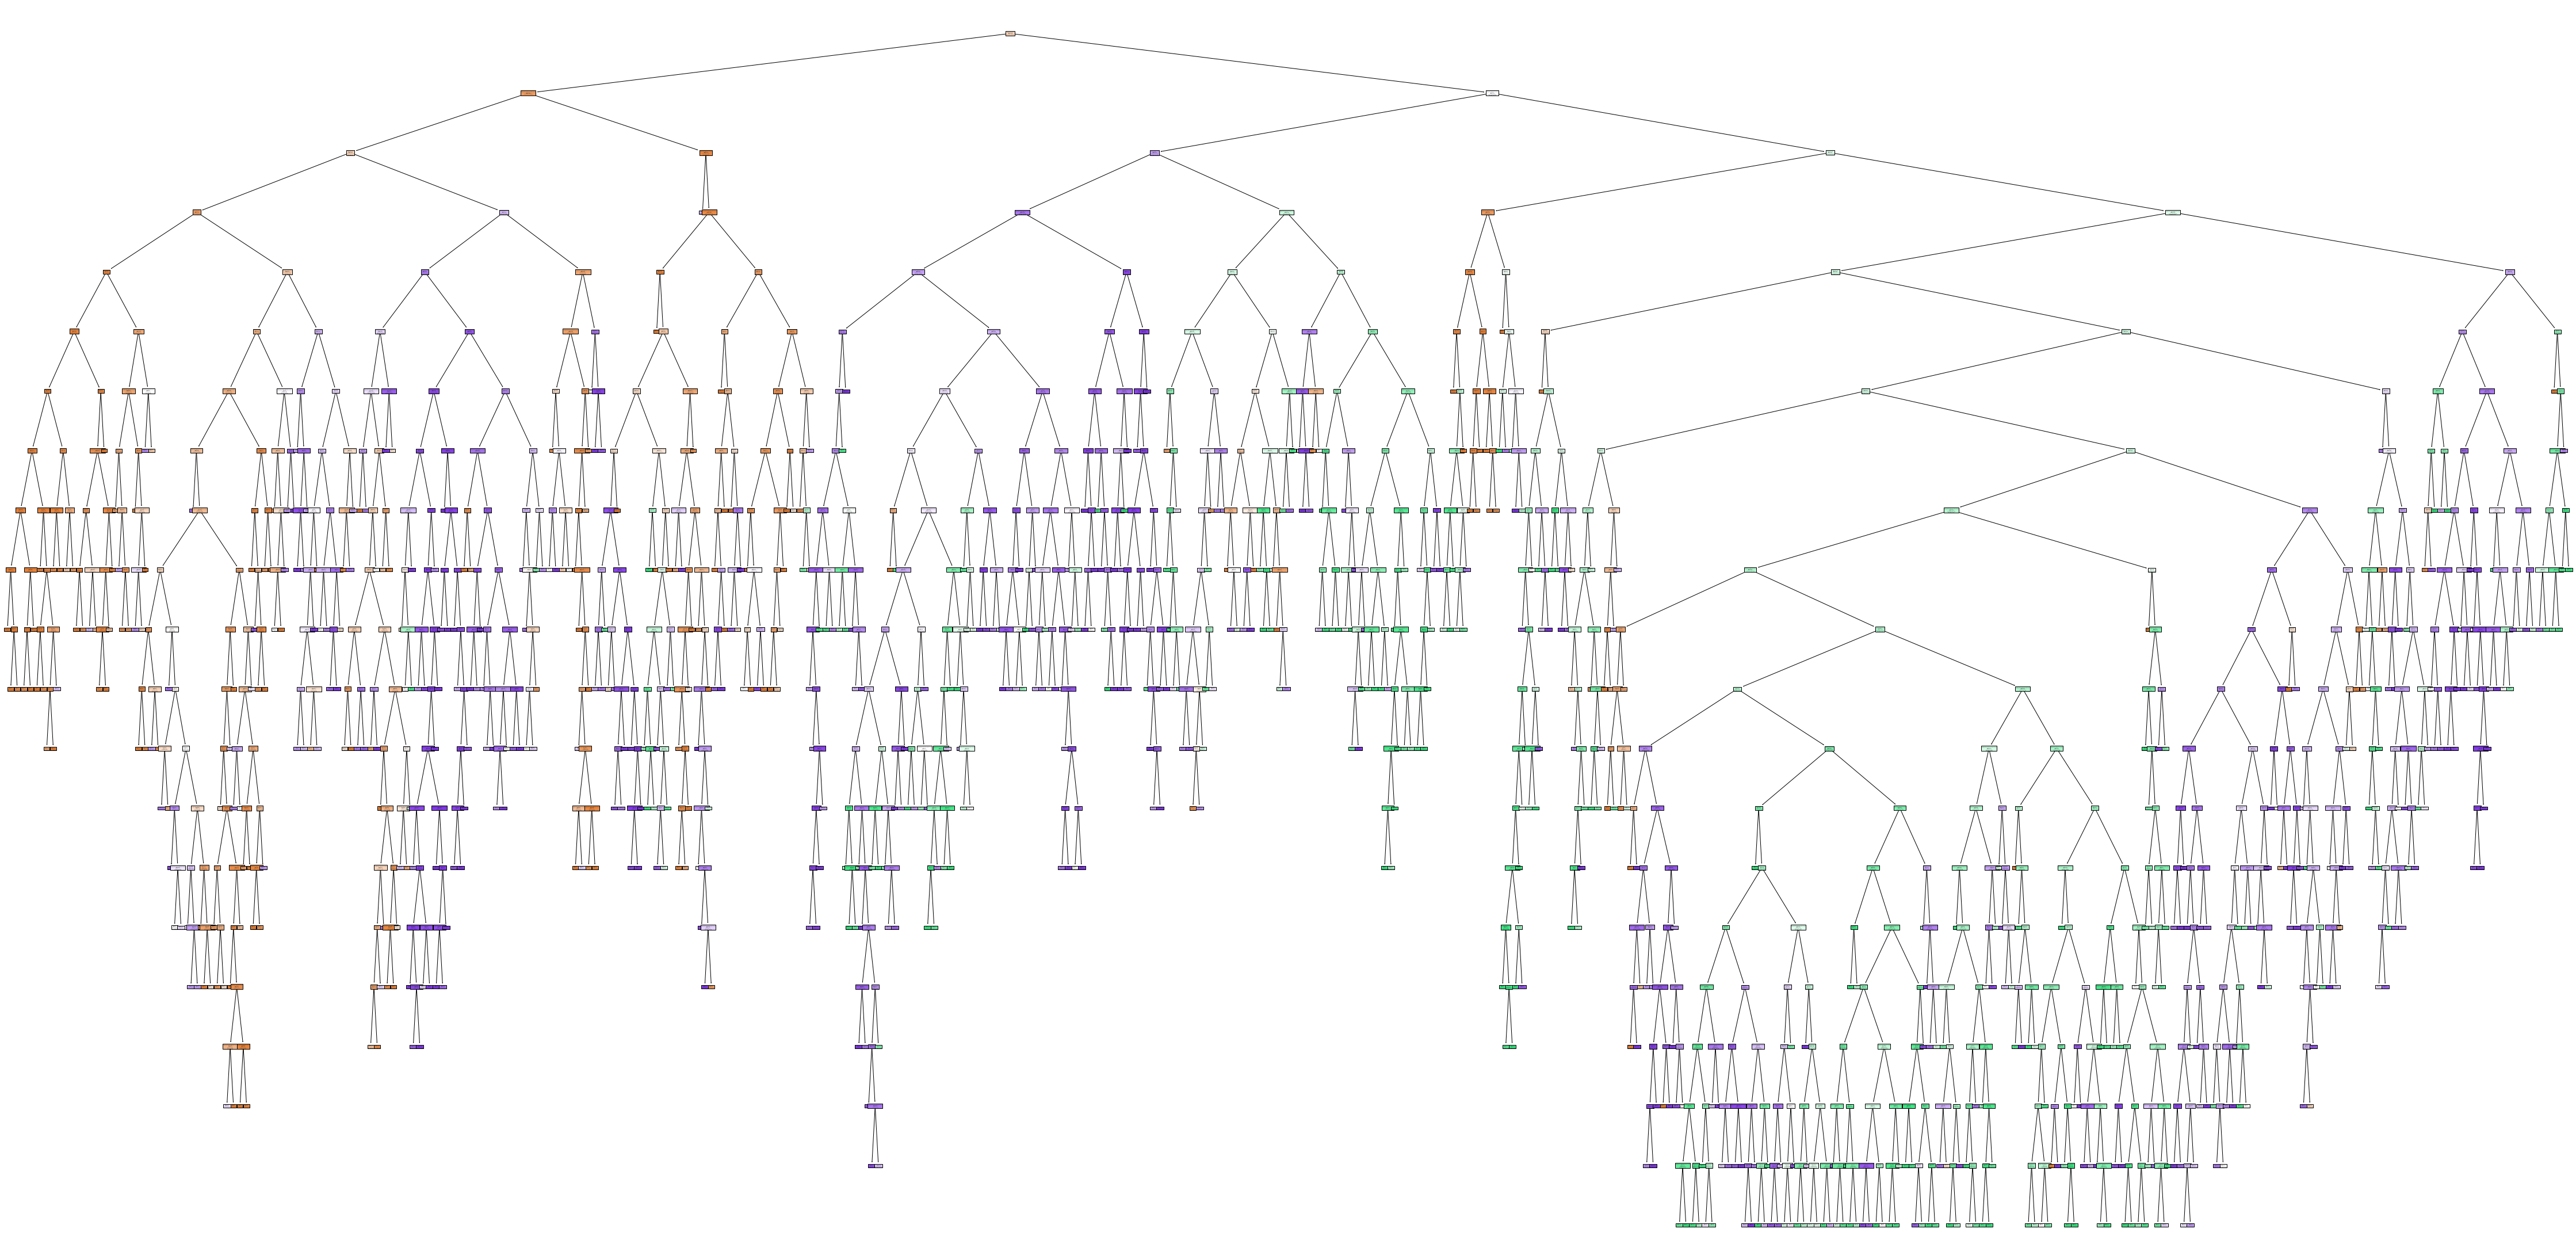

In [145]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=["Light_Load", "Medium_Load","Maximum_Load"],filled=True);



In [146]:
fig.savefig("Random_forest_7.png") # Saving the visual

### The trees created by estimators_[5] and estimators_[7] are different. Thus we can say that each tree is independent of the other.


### Now let’s sort the data with the help of feature importance


In [190]:
rf_best.feature_importances_

array([0.1711561 , 0.07302218, 0.04387206, 0.08248414, 0.11769636,
       0.03937546, 0.38151726, 0.0154402 , 0.00207595, 0.0059551 ,
       0.02096088, 0.00199093, 0.00160003, 0.00242066, 0.04043269])

In [191]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Importance": rf_best.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

Varname  Importance
6                                    NSM    0.381517
0                              Usage_kWh    0.171156
4           Lagging_Current_Power_Factor    0.117696
3                              CO2(tCO2)    0.082484
1   Lagging_Current_Reactive.Power_kVarh    0.073022
2   Leading_Current_Reactive_Power_kVarh    0.043872
14                           Shift_Night    0.040433
5           Leading_Current_Power_Factor    0.039375
10                    Day_of_week_Sunday    0.020961
7                     WeekStatus_Weekend    0.015440
9                   Day_of_week_Saturday    0.005955
13                 Day_of_week_Wednesday    0.002421
8                     Day_of_week_Monday    0.002076
11                  Day_of_week_Thursday    0.001991
12                   Day_of_week_Tuesday    0.001600

### Observation: Variable NSM has maximum importance on target variable Load_Type. After that Usage_kWh has second highest importance. Also the model is has 90% accuracy so this model can be accepted.